# Modeling

In [335]:
#Import Warnings to remove warning while runnig code

import warnings  
warnings.filterwarnings('ignore')

In [336]:
#Import libraries needed for modeling

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re


import requests
import time

#For Modeling
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.pipeline import Pipeline

from sklearn.model_selection import train_test_split, GridSearchCV

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC


%matplotlib inline

#### Maximize DataFrame Display Columns

In [337]:
#Remove the max column setting in pandas

pd.options.display.max_columns = None
pd.options.display.max_rows = None

## Import .csv

In [380]:
df = pd.read_csv('./datasets/reddit_politic.csv')

### Data Cleaning with Regular Expressions

In [381]:
#Using regular expressions to remove extra characters, and custom stop words

df['all_text'] = df['all_text'].map(lambda x: re.sub('\s[\/]?r\/[^s]+', ' ', x))
df['all_text'] = df['all_text'].map(lambda x: re.sub('http[s]?:\/\/[^\s]*', ' ', x))
df['all_text'] = df['all_text'].map(lambda x: re.sub('(pete|buttigieg|petebuttigieg|mayor|bernie|sanders|bern|elizabeth|liz|warren|kamala|harris|kamalaharris)[s]?', ' ', x, flags=re.I))


## Baseline Accuracy

In [382]:
df['label'].value_counts(normalize = True)

kamala       0.264316
bernie       0.262460
buttigieg    0.261930
warren       0.211294
Name: label, dtype: float64

## Instantiate Features and Target Column

In [414]:
from sklearn import preprocessing

In [415]:
X = df[['all_text']]

In [416]:
#Use label encoder to numerate the y categories

le = preprocessing.LabelEncoder()

In [417]:
y = le.fit_transform(df['label'])

In [418]:
le.classes_

array(['bernie', 'buttigieg', 'kamala', 'warren'], dtype=object)

In [419]:
#le.inverse_transform(y)

In [420]:
#y = df['label'].map({'bernie':0, 'buttigieg':1, 'kamala': 2, 'warren': 3})

## Train Test Split

In [421]:
X.shape

(3772, 1)

In [422]:
y.shape

(3772,)

In [423]:
from sklearn.model_selection import train_test_split

In [424]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

### Tokenize

In [425]:
#import spacy
#nlp = spacy.load('en_core_web_sm')

In [426]:
tfidf = TfidfVectorizer(stop_words = 'english', max_df=.9, min_df=2, ngram_range=(1,2), norm='l2')

#### Sparse Matrix for tfidf object

In [427]:
#Training data
train_raw = tfidf.fit_transform(X_train['all_text'])

# use SparseDataFrame for space considerations
train_df = pd.SparseDataFrame(train_raw, columns=tfidf.get_feature_names())
train_df.fillna(0, inplace = True)

#Testing data
test_raw = tfidf.transform(X_test['all_text'])

# use SparseDataFrame for space considerations
test_df = pd.SparseDataFrame(test_raw, columns=tfidf.get_feature_names())
test_df.fillna(0, inplace = True)

In [428]:
tfidf.get_feature_names()

['00',
 '00 pm',
 '000',
 '000 days',
 '000 donations',
 '000 donors',
 '000 houses',
 '000 individual',
 '000 new',
 '000 people',
 '000 registered',
 '000 subscribers',
 '000 year',
 '00pm',
 '01',
 '02',
 '05',
 '06',
 '07',
 '08',
 '10',
 '10 00',
 '10 000',
 '10 buttigieg',
 '10 candidates',
 '10 friends',
 '10 harris',
 '10 minutes',
 '10 warren',
 '10 years',
 '100',
 '100 00',
 '100 000',
 '100 bernie',
 '100 days',
 '100 donating',
 '1000',
 '100k',
 '10k',
 '10th',
 '11',
 '11 17',
 '11 harris',
 '11 million',
 '11 warren',
 '11pm',
 '11pm est',
 '11th',
 '12',
 '12 buttigieg',
 '12 million',
 '12m',
 '12pm',
 '12th',
 '12th kamala',
 '13',
 '13 16',
 '13 buttigieg',
 '13 harris',
 '13 sanders',
 '13 warren',
 '13th',
 '14',
 '14 amp',
 '14 buttigieg',
 '14 harris',
 '14 sanders',
 '14th',
 '15',
 '15 buttigieg',
 '15 harris',
 '15 hour',
 '15 hr',
 '15 minimum',
 '15 sanders',
 '15 warren',
 '15 years',
 '150',
 '1500',
 '1500 new',
 '16',
 '16 harris',
 '16 warren',
 '160',

## Random Forest

In [221]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

In [54]:
#Instantiate Random Forest

rfc = RandomForestClassifier(criterion = 'entropy', n_estimators=100, min_samples_split=5)

In [55]:
#Fit the model
rfc.fit(train_df, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [56]:
#Training Accuracy Score
rfc.score(train_df, y_train)

0.983739837398374

In [57]:
#Testing Accuracy Score
rfc.score(test_df, y_test)

0.5090137857900318

## Gradient Boosting Classifier

In [628]:
from sklearn.ensemble import GradientBoostingClassifier

In [629]:
#Instantiate GBC
gbc = GradientBoostingClassifier()

In [630]:
#Fit the model
gbc.fit(train_df, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [631]:
#Score the train
gbc.score(train_df, y_train)

0.968186638388123

In [632]:
#Score the test
gbc.score(test_df, y_test)

0.848356309650053

# Naive Bayes

In [398]:
#Import Naive Bayes models
from sklearn.naive_bayes import GaussianNB, MultinomialNB

#### Gaussian

In [399]:
#Instantiate Gaussian Naive Bayes
bayes_g = GaussianNB()

In [400]:
#Fit
bayes_g.fit(train_df, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [401]:
#Train score
bayes_g.score(train_df, y_train)

0.9614704842700601

In [402]:
#Test score
bayes_g.score(test_df, y_test)

0.5503711558854719

#### Multinomial

In [403]:
#Instantiate
bayes_m = MultinomialNB(alpha = .4)

In [404]:
#fit
bayes_m.fit(train_df, y_train)

MultinomialNB(alpha=0.4, class_prior=None, fit_prior=True)

In [405]:
#Score Train
bayes_m.score(train_df, y_train)

0.9664192294096854

In [406]:
#Score Test
bayes_m.score(test_df, y_test)

0.7836691410392365

# Logistic Regression

In [429]:
# Load library
from sklearn.linear_model import LogisticRegression

In [430]:
# Create one-vs-rest logistic regression object
lr = LogisticRegression(random_state=0, multi_class='multinomial', solver='newton-cg')

In [431]:
#Fit
lr.fit(train_df, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=0, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [432]:
#Use the logistic regression model to generate prediction on the test data
y_pred = lr.predict(test_df)

In [433]:
#Accuracy Score for training data
lr.score(train_df, y_train)

0.9731353835277483

In [434]:
#Accuracy Score for testing data
lr.score(test_df, y_test)

0.8525980911983033

In [372]:
#Create a coefficient dataframe from the feature columns and the coefficients.  Transposed to be in column form.
coefficients = pd.concat([pd.DataFrame(train_df.columns),pd.DataFrame(np.transpose(lr.coef_))], axis = 1)

In [373]:
#Re-naming and Reordering the columns

coefficients['Feature']=coefficients.iloc[:,0]
coefficients['Sanders']=coefficients.iloc[:,1]
coefficients['Buttigieg']=coefficients.iloc[:,2]
coefficients['Kamala']=coefficients.iloc[:,3]
coefficients['Warren']=coefficients.iloc[:,4]

In [374]:
#rename the features from the Label Encoder
coefficients = coefficients[['Feature','Buttigieg', 'Kamala', 'Sanders','Warren']]

In [379]:
#sample coefficients
coefficients.sort_values('Kamala', ascending = False).head(5)

,Feature,Buttigieg,Kamala,Sanders,Warren
6652,her,-2.499729,2.045928,-1.960021,2.413822
12931,she,-2.303012,1.946612,-1.522564,1.878964
1938,barr,-0.777868,1.788763,-0.738697,-0.272197
2735,california,-0.797150,1.613168,-0.592057,-0.223962
17187,women,-0.353399,1.491147,-0.887852,-0.249896


### Save for Visualization

In [334]:
#Save coefficient dataframe to .csv for visualizations
coefficients.to_csv('./datasets/coef_df_noname.csv', index=False)

## Confusion Matrix

In [325]:
#Import packages to print confusion matrices and classification reports to analyze the results
from sklearn.metrics import confusion_matrix, multilabel_confusion_matrix, classification_report

conf_mat = confusion_matrix(y_test, y_pred)
mult_conf_mat = multilabel_confusion_matrix(y_test,y_pred)
classreport = classification_report(y_test, y_pred,target_names=['Sanders','Buttigieg','Harris','Warren'], )

In [326]:
#Confusion Matrices -- from top to bottom:
    #Sanders, Buttigieg, Harris, Warren

mult_conf_mat

array([[[586, 117],
        [ 86, 154]],

       [[599,  95],
        [109, 140]],

       [[539, 147],
        [110, 147]],

       [[680,  66],
        [120,  77]]])

In [331]:
#Classification Report for each of the Subreddit

print(classrepo5rt)

              precision    recall  f1-score   support

     Sanders       0.57      0.64      0.60       240
   Buttigieg       0.60      0.56      0.58       249
      Harris       0.50      0.57      0.53       257
      Warren       0.54      0.39      0.45       197

    accuracy                           0.55       943
   macro avg       0.55      0.54      0.54       943
weighted avg       0.55      0.55      0.55       943



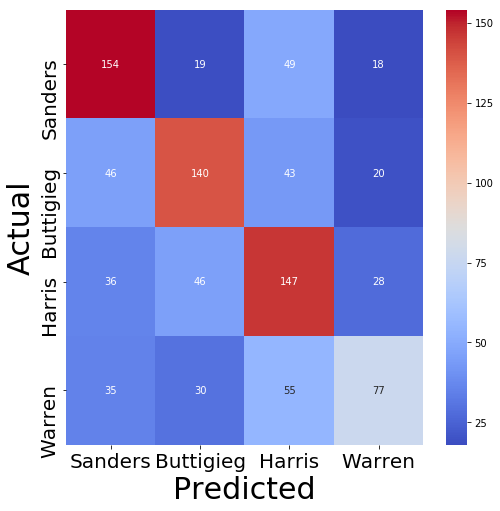

In [320]:
#Heatmap of the confusion matrix
fig, ax = plt.subplots(figsize=(8,8))

sns.heatmap(conf_mat, annot=True, fmt='d', cmap = 'coolwarm',
            xticklabels=(['Sanders','Buttigieg','Harris','Warren']), yticklabels=['Sanders','Buttigieg','Harris','Warren'])
plt.ylabel('Actual', fontsize=30)
plt.xlabel('Predicted', fontsize = 30)

ax.tick_params(labelsize = 20)


plt.show()

### Pickle Model

In [309]:
import pickle
s = pickle.dumps(gs) # GridSearch on Gradient Boosting Classifier
gs2 = pickle.loads(s)

# Failed Code Below

## XG Boost Model for Multi-Class Classification

In [436]:
# Import the xgboost package
import xgboost as xgb

In [437]:
clf = xgb.XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7)

In [438]:
# Instantiate an XGBoost classifier
xgb_reg = xgb.XGBClassifier(objective = "multi:softprob")

In [439]:
train_df.head()

,00,00 pm,000,000 days,000 donations,000 donors,000 houses,000 individual,000 new,000 people,000 registered,000 subscribers,000 year,00pm,01,02,05,06,07,08,10,10 00,10 000,10 buttigieg,10 candidates,10 friends,10 harris,10 minutes,10 warren,10 years,100,100 00,100 000,100 bernie,100 days,100 donating,1000,100k,10k,10th,11,11 17,11 harris,11 million,11 warren,11pm,11pm est,11th,12,12 buttigieg,12 million,12m,12pm,12th,12th kamala,13,13 16,13 buttigieg,13 harris,13 sanders,13 warren,13th,14,14 amp,14 buttigieg,14 harris,14 sanders,14th,15,15 buttigieg,15 harris,15 hour,15 hr,15 minimum,15 sanders,15 warren,15 years,150,1500,1500 new,16,16 harris,16 warren,160,17,17 harris,17 sanders,17 warren,18,18 harris,18 million,18 questions,18 sanders,18m,18th,19,19 harris,19 kamala,19 million,1949,1969,1975,1988,1993,1993 bernie,1994,19th,1m,1pm,1st,1st kamala,1st place,20,20 000,20 13,20 30,20 biden,20 warren,200,200 mark,200 people,2000,2003,2004,2008,2009,200k,2010,2011,2012,2014,2015,2016,2016 bernie,2016 wasn,2017,2018,2019,2019 month,2019 national,2019 welcome,2020,2020 battleground,2020 campaign,2020 candidate,2020 candidates,2020 changing,2020 crucial,2020 democrat,2020 democratic,2020 democrats,2020 dems,2020 election,2020 field,2020 hopeful,2020 kamala,2020 mojo,2020 policy,2020 presidential,2020 primary,2020 race,2020 rankings,2020 vision,20th,21,21 5m,21 warren,218,22,22 10,22 19,22 25,22 biden,22 democratic,22 harris,22m,22nd,23,23 30,23rd,24,24 800,24 8m,24 harris,24 hours,24 million,24k,24th,25,25 warren,250,250 000,25859,25859 closest,26,26 sanders,264th,264th subreddit,26th,27,27 29,27 sanders,270,28,28 jul,28 july,28 sanders,28th,29,29 2019,29 sanders,2nd,2nd kamala,2nd place,2nd quarter,30,30 big,30 lgbtqia,30 minute,30 minutes,30 pm,30 sanders,30 years,300,30pm,30th,31,31 percent,31st,32,33,33 sanders,34,34 sanders,35,350,36,37,37 year,38,39,3rd,3rd biden,40,40 000,40 50,40 million,40 years,400,400 000,41,42,43,44,45,45 million,450,46,47,48,49,4th,4th july,50,50 000,50 billion,50 million,50 years,500,500 month,50k,53,538,538 morning,538 poll,54,55,56,59,5k,5m,5m sanders,5th,60,60 millionaires,600,600 month,600k,65,65 000,67,6m,6th,70,70th,70th birthday,72,73,74,75,75 people,76,78,7m,7th,80,800,800 000,80k,80s,82623,82623 vote,83,88,88 dollars,8m,8m biden,8pm,8pm eastern,8pm est,8pm et,8th,900,900 event,90s,95,99,9pm,9pm eastern,9pm est,9pm et,9th,abc,abc news,abide,abide rules,ability,able,able make,able vote,able work,abolish,abolishing,abolishing private,abortion,abortion access,abortion ban,abortion rights,abrams,abroad,absence,absolute,absolutely,absurd,abuse,aca,academic,accept,acceptable,accepted,accepting,access,access opportunity,access reproductive,access resources,accidentally,accomplish,accomplished,accomplishments,according,according campaign,according new,account,accountability,accountable,accounts,accurate,accusations,accused,achieve,achieve goal,achieved,acknowledge,acknowledged,acknowledges,act,act blue,act debate,act gives,act kamala,act net,act senate,actblue,actblue express,acted,action,action climate,action network,actions,active,actively,activism,activist,activists,activists bernie,activists current,activists force,activists leaders,activists organizations,activists writing,activities,activity,actors,actual,actually,actually like,actually want,ad,adam,add,add time,added,addiction,adding,addition,addition pete,additional,additionally,address,address battle,address issues,address ll,address naacp,address problem,address racial,addressed,addresses,addressing,administration,admit,admits,adopting,adoption,adorable,adrienne,ads,adult,adult room,adults,advance,advanced,advances,advancing,advantage,adversaries,advertisement,advice,advisor,advisory,advocacy,advocacy validates,advocate,advocating,affairs,affect,affected,affecting,affects,afford,affordable,affordable care,afghan,afghanistan,afraid,african,african american,african americans,aftermath,ag,ag barr,age,age isn,ageism,agencies,agency,agenda,agenda a

In [440]:
clf.fit(train_df, y)

ValueError: DataFrame.dtypes for data must be int, float or bool.
                Did not expect the data types in fields 00, 00 pm, 000, 000 days, 000 donations, 000 donors, 000 houses, 000 individual, 000 new, 000 people, 000 registered, 000 subscribers, 000 year, 00pm, 01, 02, 05, 06, 07, 08, 10, 10 00, 10 000, 10 buttigieg, 10 candidates, 10 friends, 10 harris, 10 minutes, 10 warren, 10 years, 100, 100 00, 100 000, 100 bernie, 100 days, 100 donating, 1000, 100k, 10k, 10th, 11, 11 17, 11 harris, 11 million, 11 warren, 11pm, 11pm est, 11th, 12, 12 buttigieg, 12 million, 12m, 12pm, 12th, 12th kamala, 13, 13 16, 13 buttigieg, 13 harris, 13 sanders, 13 warren, 13th, 14, 14 amp, 14 buttigieg, 14 harris, 14 sanders, 14th, 15, 15 buttigieg, 15 harris, 15 hour, 15 hr, 15 minimum, 15 sanders, 15 warren, 15 years, 150, 1500, 1500 new, 16, 16 harris, 16 warren, 160, 17, 17 harris, 17 sanders, 17 warren, 18, 18 harris, 18 million, 18 questions, 18 sanders, 18m, 18th, 19, 19 harris, 19 kamala, 19 million, 1949, 1969, 1975, 1988, 1993, 1993 bernie, 1994, 19th, 1m, 1pm, 1st, 1st kamala, 1st place, 20, 20 000, 20 13, 20 30, 20 biden, 20 warren, 200, 200 mark, 200 people, 2000, 2003, 2004, 2008, 2009, 200k, 2010, 2011, 2012, 2014, 2015, 2016, 2016 bernie, 2016 wasn, 2017, 2018, 2019, 2019 month, 2019 national, 2019 welcome, 2020, 2020 battleground, 2020 campaign, 2020 candidate, 2020 candidates, 2020 changing, 2020 crucial, 2020 democrat, 2020 democratic, 2020 democrats, 2020 dems, 2020 election, 2020 field, 2020 hopeful, 2020 kamala, 2020 mojo, 2020 policy, 2020 presidential, 2020 primary, 2020 race, 2020 rankings, 2020 vision, 20th, 21, 21 5m, 21 warren, 218, 22, 22 10, 22 19, 22 25, 22 biden, 22 democratic, 22 harris, 22m, 22nd, 23, 23 30, 23rd, 24, 24 800, 24 8m, 24 harris, 24 hours, 24 million, 24k, 24th, 25, 25 warren, 250, 250 000, 25859, 25859 closest, 26, 26 sanders, 264th, 264th subreddit, 26th, 27, 27 29, 27 sanders, 270, 28, 28 jul, 28 july, 28 sanders, 28th, 29, 29 2019, 29 sanders, 2nd, 2nd kamala, 2nd place, 2nd quarter, 30, 30 big, 30 lgbtqia, 30 minute, 30 minutes, 30 pm, 30 sanders, 30 years, 300, 30pm, 30th, 31, 31 percent, 31st, 32, 33, 33 sanders, 34, 34 sanders, 35, 350, 36, 37, 37 year, 38, 39, 3rd, 3rd biden, 40, 40 000, 40 50, 40 million, 40 years, 400, 400 000, 41, 42, 43, 44, 45, 45 million, 450, 46, 47, 48, 49, 4th, 4th july, 50, 50 000, 50 billion, 50 million, 50 years, 500, 500 month, 50k, 53, 538, 538 morning, 538 poll, 54, 55, 56, 59, 5k, 5m, 5m sanders, 5th, 60, 60 millionaires, 600, 600 month, 600k, 65, 65 000, 67, 6m, 6th, 70, 70th, 70th birthday, 72, 73, 74, 75, 75 people, 76, 78, 7m, 7th, 80, 800, 800 000, 80k, 80s, 82623, 82623 vote, 83, 88, 88 dollars, 8m, 8m biden, 8pm, 8pm eastern, 8pm est, 8pm et, 8th, 900, 900 event, 90s, 95, 99, 9pm, 9pm eastern, 9pm est, 9pm et, 9th, abc, abc news, abide, abide rules, ability, able, able make, able vote, able work, abolish, abolishing, abolishing private, abortion, abortion access, abortion ban, abortion rights, abrams, abroad, absence, absolute, absolutely, absurd, abuse, aca, academic, accept, acceptable, accepted, accepting, access, access opportunity, access reproductive, access resources, accidentally, accomplish, accomplished, accomplishments, according, according campaign, according new, account, accountability, accountable, accounts, accurate, accusations, accused, achieve, achieve goal, achieved, acknowledge, acknowledged, acknowledges, act, act blue, act debate, act gives, act kamala, act net, act senate, actblue, actblue express, acted, action, action climate, action network, actions, active, actively, activism, activist, activists, activists bernie, activists current, activists force, activists leaders, activists organizations, activists writing, activities, activity, actors, actual, actually, actually like, actually want, ad, adam, add, add time, added, addiction, adding, addition, addition pete, additional, additionally, address, address battle, address issues, address ll, address naacp, address problem, address racial, addressed, addresses, addressing, administration, admit, admits, adopting, adoption, adorable, adrienne, ads, adult, adult room, adults, advance, advanced, advances, advancing, advantage, adversaries, advertisement, advice, advisor, advisory, advocacy, advocacy validates, advocate, advocating, affairs, affect, affected, affecting, affects, afford, affordable, affordable care, afghan, afghanistan, afraid, african, african american, african americans, aftermath, ag, ag barr, age, age isn, ageism, agencies, agency, agenda, agenda america, agenda bernie, agenda harris, agenda make, agenda passed, aggressive, aggressive push, ago, agree, agree feel, agreement, agreements, ahead, ahead democratic, ai, aid, aide, aide said, aids, aim, aimed, aiming, aims, ain, air, air force, aka, al, al sharpton, alabama, alabama abortion, alabama elections, alarm, album, alerts, alien, align, alive, allegations, allegations facilties, alliance, alliances, allies, allow, allow people, allowed, allowing, allowing daca, allowing special, allows, ally, alongside, alternate, alternative, altogether, ama, amazing, amazon, amendment, amendment end, america, america convention, america does, america future, america national, america needs, america ready, america women, american, american citizens, american life, american people, american public, american workers, americans, americans dying, americans having, americans live, americans support, americans trillion, ames, ames ia, amounts, amp, amp activist, amp centrist, amp chasten, amp foreign, amp kamala, amp nbsp, amp x200b, amy, amy klobuchar, analysis, andrew, andrew gillum, andrew yang, angeles, anger, anger racial, angry, animals, anniversary, annotated, annotated breakdown, announce, announced, announcement, announcements, announces, announcing, annoying, annual, annually, answer, answer question, answer questions, answer yes, answered, answered civil, answered question, answering, answers, anti, anti bernie, anti busing, anti corruption, anti kamala, anti nuclear, anti pete, anti trump, anxiety, anxious, anybody, anymore, anytime, anyways, aoc, aoc amp, aoc democrats, ap, apart, app, app hinge, apparently, appeal, appeal black, appealing, appeals, appear, appearance, appearances, appears, appears new, applaud, applauded, applause, apple, application, applications, applied, apply, apply daily, appoint, appointed, appointment, appreciate, appreciated, approach, approaches, appropriate, appropriate score, approval, approved, approximately, april, april 2019, april 28th, april 2nd, april just, arc, arches, arches symbol, area, areas, aren, aren actively, aren involved, aren paying, argue, arguing, argument, argument pete, arguments, arguments bernie, arizona, arkansas, arm, armed, army, arrested, arrived, arriving, art, article, article attack, article blasted, article kamala, articles, articulate, asap, asian, aside, ask, ask bernie, ask campaign, ask questions, asked, asked question, asking, asking questions, asks, aspects, ass, assault, assessment, assessments, asset, assets, assigned, assist, assistance, associated, association, assume, assumed, assuming, assure, astroturfing, ate, atheist, atlanta, attaching, attack, attack bernie, attack policies, attacked, attacking, attacking candidates, attacks, attacks dividing, attacks kamala, attempt, attempts, attempts rank, attend, attendance, attended, attending, attention, attention comment, attitude, attorney, attorney general, attract, attracting, audience, audio, author, authority, authorize, automatic, automation, available, avalanche, avalanche poll, avenue, average, average donation, averages, avid, avoid, avoid circular, avoid filling, avoiding, aware, away, away bernie, away talking, awesome, awesomeness, awesomeness elizabeth, awful, awhile, baby, baby boomers, backed, backers, background, background checks, backgrounds, backing, backlash, backs, backstage, bad, bad faith, bad news, bad thing, badass, bag, bail, bailout, bakari, bakari sellers, balance, balance ticket, balance warren, balanced, ballot, ban, ban private, band, bandwagon, bank, banking, banking canvassing, bankruptcy, banks, banner, banner reflect, banning, bar, barack, barack obama, barbara, barbara lee, bare, barely, barnstorm, barnstorms, barr, barred, barriers, bars, bars restaurants, base, based, based care, based ideas, based insurance, based race, based run, baseless, bash, basic, basic human, basically, basics, basis, battle, battle born, battleground, battleground states, bay, bay area, bbc, bc, beach, bear, beat, beat trump, beating, beats, beautiful, beer, began, begin, beginning, begins, begins 9pm, behavior, behaviors, behold, beholden, belief, believe, believe best, believe pete, believed, believes, believes public, belong, belongs, belt, beltway, belén, belén sisa, ben, bend, bend community, bend cops, bend efforts, bend ind, bend indiana, bend mayor, bend naacp, bend pete, bend police, bend resident, bend shooting, bend town, beneficial, benefit, benefits, bennet, berkeley, bern, bern app, bern episode, bernie, bernie 2016, bernie 2020, bernie abroad, bernie amp, bernie barnstorms, bernie best, bernie biden, bernie bumper, bernie bust, bernie called, bernie came, bernie campaign, bernie candidate, bernie debate, bernie did, bernie didn, bernie does, bernie doesn, bernie doing, bernie don, bernie election, bernie fight, bernie fighting, bernie gets, bernie getting, bernie going, bernie got, bernie hasn, bernie ice, bernie know, bernie let, bernie like, bernie likely, bernie ll, bernie make, bernie making, bernie marching, bernie medicare, bernie merch, bernie message, bernie moved, bernie need, bernie needs, bernie new, bernie night, bernie nina, bernie opposite, bernie passed, bernie person, bernie pete, bernie plan, bernie plans, bernie platform, bernie policies, bernie policy, bernie proud, bernie q2, bernie raised, bernie really, bernie right, bernie rotating, bernie sander, bernie sanders, bernie says, bernie second, bernie shirt, bernie simply, bernie speaks, bernie specific, bernie stands, bernie sticker, bernie supporter, bernie supporters, bernie talking, bernie team, bernie time, bernie today, bernie trump, bernie turn, bernie video, bernie wants, bernie warren, bernie website, bernie west, bernie win, bernie2020, bernies, bernies plan, berniesanders, berniesanders com, bernin, berning, best, best america, best candidate, best choice, best friend, best future, best handle, best interests, best mind, best option, best steps, best thing, best way, bet, beto, beto rourke, beto supporter, better, better candidate, better care, better inclusive, better ones, better person, better policy, better way, bhaskar, bi, bi weekly, bias, bias running, bias training, biased, bible, bid, biden, biden 18, biden 2020, biden 21, biden 22, biden 24, biden 25, biden 26, biden 27, biden 28, biden 29, biden 30, biden 33, biden 34, biden 36, biden administration, biden amp, biden bernie, biden biden, biden buttigieg, biden comments, biden debate, biden elizabeth, biden gets, biden harris, biden just, biden kamala, biden lead, biden leads, biden make, biden pass, biden pete, biden record, biden sanders, biden says, biden segregationist, biden slides, biden suggests, biden supporting, biden voted, biden warren, big, big banks, big bump, big companies, big deal, big donors, big fundraising, big money, big new, big pharma, big picture, big supporter, big tech, bigger, biggest, bigotry, billion, billion plan, billionaire, billionaire class, billionaires, billionaires closed, billions, bills, bills bills, bills introduced, bills passed, birthday, birther, birtherism, bit, bit busy, bit different, bites, black, black americans, black caucus, black community, black entrepreneurship, black leaders, black man, black maternal, black moms, black people, black police, black problem, black residents, black vote, black voters, black women, blacks, blacks whites, blasio, blast, blasted, blasted anti, blasts, blatant, blatantly, blatantly breaking, bless, blindly, bloated, bloated military, bloc, block, blocking, blocks, blog, blood, blood pressure, blow, blown, blue, blue leaning, blue restore, bluffs, bluffs ia, blunt, bluntly, board, board directors, body, body cameras, body language, bold, bolster, bomb, bomber, bonus, book, book reading, booker, booker amp, booker castro, booker kamala, booker rourke, books, boomers, boost, boot, boot edge, border, born, born progress, born raised, borrowers, boston, bots, bought, bound, bout, bowl, box, boy, brain, branch, brand, brand new, break, break big, breakdown, breakdown 2020, breakdowns, breakfast, breaking, breaking fourth, breaking subreddit, breaks, breakthrough, briahna, briahna joy, brief, briefing, brilliant, bring, bring attention, bringing, bringing people, brings, bro, broad, broke, broke neck, broken, brooklyn, brother, brothers, brothers sisters, brought, brought community, brown, brown board, browsing, bruenig, bs, btrtn, btrtn 2020, btrtn joe, btrtn miami, btw, bubble, bucks, budget, build, build coalition, building, building data, building kind, builds, built, built fundraising, bullies, bullshit, bump, bumper, bumper sticker, bumper stickers, bunch, burden, bureau, burn, burn rate, burst, bus, bus drivers, bush, bush mo, business, business owner, businesses, busing, busing court, bust, busy, buttigang, buttigeg, buttigieg, buttigieg 10, buttigieg 11, buttigieg 15, buttigieg 2020, buttigieg 24, buttigieg 25, buttigieg addresses, buttigieg booker, buttigieg built, buttigieg calls, buttigieg campaign, buttigieg candidacy, buttigieg candidate, buttigieg cnn, buttigieg coming, buttigieg currently, buttigieg democratic, buttigieg discussion, buttigieg elizabeth, buttigieg faces, buttigieg going, buttigieg gt, buttigieg headline, buttigieg hold, buttigieg husband, buttigieg managed, buttigieg mayor, buttigieg new, buttigieg plans, buttigieg police, buttigieg president, buttigieg proposes, buttigieg provincetown, buttigieg report, buttigieg responds, buttigieg response, buttigieg rising, buttigieg rourke, buttigieg says, buttigieg south, buttigieg speaks, buttigieg surge, buttigieg tells, buttigieg ticket, buttigieg unveils, buttigieg using, buttigieg way, button, button mods, buttons, buy, buy election, buy official, buying, ca, cable, cages, calculation, calculations, calculator, calendar, calif, california, california governor, called, calling, calling biden, calling nasty, calls, calls barr, calm, came, came bernie, came twitter, camera, cameras, camp, camp kamala, campaign, campaign aide, campaign aiming, campaign amp, campaign asking, campaign campaign, campaign chair, campaign donations, campaign early, campaign emails, campaign event, campaign events, campaign far, campaign finance, campaign fundraising, campaign instead, campaign just, campaign kamala, campaign know, campaign launches, campaign like, campaign live, campaign make, campaign manager, campaign materials, campaign merch, campaign movement, campaign need, campaign needs, campaign page, campaign people, campaign presidential, campaign progressive, campaign rally, campaign received, campaign said, campaign sanders, campaign says, campaign site, campaign staff, campaign stands, campaign starting, campaign stop, campaign stops, campaign time, campaign trail, campaign video, campaign volunteer, campaign website, campaigned, campaigning, campaigns, campaigns causes, campaigns connecting, campaigns including, camps, campus, cancel, cancel student, canceled, cancellation, cancellation student, cancer, candidacy, candidate, candidate 2020, candidate bernie, candidate campaign, candidate elite, candidate elizabeth, candidate forum, candidate gets, candidate getting, candidate just, candidate kamala, candidate kamalaharris, candidate like, candidate mayor, candidate neutral, candidate pete, candidate president, candidate sen, candidate stage, candidate think, candidate tonight, candidate trends, candidate want, candidate website, candidate win, candidates, candidates bit, candidates divided, candidates got, candidates just, candidates kamala, candidates like, candidates live, candidates local, candidates night, candidates placed, candidates policies, candidates polling, candidates president, candidates questions, candidates received, candidates report, candidates rule, candidates start, candidates talk, candidates terms, candidates think, candidates ve, candidates won, canvass, canvassing, canvassing fundraisers, capable, capacity, capital, capitalism, capitalist, caption, captured, captures, car, carbon, carbon monoxide, card, card companies, cards, care, care act, care cost, care coverage, care especially, care like, care need, care people, care work, career, career prosecutor, carefully, caregivers, cares, caring, carolina, carpool, carpool vote, carry, cars, carson, carson city, carter, cartoon, cartoon president, cartoonist, case, case missed, case need, case reparations, cases, cash, cash hand, cast, cast vote, castro, castro senator, casually, cat, catch, categories, caucus, caucus members, caucuses, caught, cause, caused, causes, cbc, cbp, cbp officer, ceiling, celebrate, celebrates, celebration, celebrations, cenk, cenk uygur, census, census data, center, center miami, center stage, centers, central, centric, centrist, centrist candidates, centrists, cents, centuries, century, ceo, certain, certain groups, certainly, chair, chair kamala, chair sen, challenge, challenge trump, challenged, challenger, challengers, challenges, challenging, champion, champions, chance, chance win, chances, change, change america, change health, change need, change research, change unless, changed, changes, changing, changing democratic, channel, channels, chapter, character, characters, charge, charged, charges, charging, charisma, charisma values, charlamagne, charleston, charlie, charm, chart, charter, charter schools, chase, chasten, chasten amp, chasten met, chasten pride, chasten twitter, chat, cheap, cheap shots, cheat, check, check amp, check twitter, checked, checker, checking, checks, checks gun, cheers, chicago, chicago locals, chicago pride, chief, child, child care, childcare, children, china, chinese, chip, chipped, choice, choice amp, choice voting, choice warren, choices, choose, choosing, chose, chosen, chris, christian, christians, church, circles, circular, circular firing, circumstances, cited, cities, citing, citizen, citizens, citizens united, citizenship, city, city council, city mayor, city nv, city south, city state, city town, city tuesday, civil, civil isn, civil relevant, civil rights, civil war, civilian, civility, claim, claiming, claims, claire, clapped, clarification, clarifies, clarify, clarity, class, class americans, class message, class sizes, class tax, class tech, classic, classroom, clause, clean, clean energy, clear, clear day, clear winner, clearer, clearly, click, click donate, click official, clients, climate, climate change, climate crisis, clinton, clip, clips, close, close racial, close second, closed, closed door, closely, closer, closest, closest event, closing, closing statement, clown, club, clyburn, cnn, cnn bernie, cnn gt, cnn interview, cnn msnbc, cnn new, cnn poll, cnn reporter, cnn ssrs, cnn town, cnn video, coach, coach grades, coalition, coalition convention, code, coexist, coffee, colbert, cold, collapse, colleagues, collect, collected, collective, collectively, collects, college, college act, college debt, college education, college green, college student, college tuition, colleges, colleges universities, colonial, color, color warren, colorado, colorado gov, colorized, colors, columbia, com, com mailto, comb, combat, combined, come, come 2020, come election, come know, come play, comeback, comes, comfort, comfort food, comfortable, coming, coming elizabeth, coming sub, comment, comment deleted, comment pm, commenting, comments, comments evaluation, comments warren, commercials, commission, commit, commitment, committed, committee, committing, common, common sense, communication, communications, communicator, communities, communities color, community, community based, community canvass, community centers, community group, community health, community help, community leaders, community members, community south, community warren, community wide, companies, companies drug, companies like, company, compare, compared, compared candidates, comparing, comparing policies, comparison, comparisons, compassion, compassionate, compelling, compensation, compete, competition, competitive, compilation, compiled, complaints, complete, completely, complex, complex fossil, comprehensive, comprehensive list, compromise, compulsory, concept, concepts, concern, concerned, concerned biden, concerns, concerns incorporated, conclude, conclude ll, concluded, conclusion, conclusions, concrete, condemn, conditions, condolences, conduct, conducted, conference, conference today, confidence, confident, confirm, confirmed, conflicts, confront, confrontation, confronted, confused, confusing, confusion, congrats, congratulations, congress, congress 2020, congress bernie, congressional, congressional black, congressmen, connect, connected, connecting, connecting world, connects, consensus, consequences, conservatism, conservative, conservatives, consider, considerable, consideration, considered, considering, considering kamala, consistency, consistent, consistently, conspiracy, conspiracy theories, constant, constantly, constituents, constitution, constitutional, consult, consumer, consumer financial, consumers, contact, contacted, contender, contenders, content, context, contingent, continue, continued, continues, contractors, contracts, contrary, contrast, contribute, contributed, contributing, contribution, contribution single, contribution today, contributions, control, controlled, controversial, controversy, convened, convention, convention july, conventional, conversation, conversations, conviction, convince, convinced, convincing, convincing friends, cool, cooper, coordination, cop, copay, copied, cops, copy, core, corey, corey booker, cori, cori bush, coribush, cornel, cornel west, corner, corporate, corporate democrat, corporate democrats, corporate greed, corporate influence, corporate lobbyist, corporate media, corporate money, corporate pac, corporate power, corporations, corporatists, correct, correctly, correspondent, corrupt, corrupt corporate, corrupting, corruption, cortez, cory, cory booker, cosmetic, cosponsor, cost, cost lot, costs, couldn, couldn fix, couldn win, council, council bluffs, council member, count, counted, counter, countries, country, country getting, country just, country new, country people, country world, counts, county, county democrats, coup, couple, couple days, couple things, couple weeks, couple years, coupled, couples, courage, course, court, court black, court justices, court plan, court ruling, courts, cousins, cover, cover people, coverage, coverage bernie, covered, covering, covers, cow, coworker, crazy, cream, cream social, create, create new, created, creating, creative, cred, credibility, credibility medicare, credit, credit 500, credit card, crew, crime, crimes, criminal, criminal justice, crises, crisis, critical, critical issues, criticism, criticisms, criticize, criticized, criticizing, critics, critique, cross, crow, crowd, crowded, crowdfund, crowdfund organize, crowds, crucial, crucial electing, crumbling, crumbling infrastructure, crush, crushed, crying, crystal, crystal clear, ct, culture, cup, cure, curious, current, current activists, current affairs, current form, current generation, current issues, current polling, current state, currently, currently draft, custom, cut, cuts, cutting, cuyahoga, cuyahoga county, cycle, cynthia, da, daca, daca recipients, dad, daily, daily discussion, daily kos, daily threads, damage, damaging, dame, damn, damn proud, damn right, dancing, danger, dangerous, data, data driven, data entry, data gt, data success, date, date bernie, dated, dating, dating app, daughter, david, david sirota, day, day age, day amp, day campaign, day carpool, day justice, day message, day national, day parade, day parades, day people, days, dc, dead, deadline, deadline let, deadline ll, deadline tomorrow, deadline tonight, deal, deal agenda, deal criminal, dealing, dear, death, death penalty, death stare, death threats, deaths, debate, debate 25859, debate amp, debate begins, debate bernie, debate campaign, debate coach, debate coming, debate don, debate edition, debate end, debate format, debate harris, debate having, debate isn, debate just, debate kamala, debate likely, debate line, debate lineup, debate nbc, debate night, debate nights, debate parties, debate party, debate performance, debate pete, debate plus, debate poll, debate proved, debate stage, debate thread, debate thursday, debate time, debate tomorrow, debate tonight, debate trump, debate watch, debate winners, debater, debaters, debates, debates candidates, debates feel, debates helped, debates july, debates night, debates think, debates tonight, debates ve, debating, debt, debt borrowers, debt cancellation, debt forgiveness, debt free, debt make, debt makes, debt plan, debt relief, decade, decades, decent, decide, decided, deciding, decision, decisions, declaration, declare, declare climate, declared, decline, decrease, decreased, decriminalizing, decriminalizing sex, dedicated, deep, deep dive, deeper, deeply, defeat, defeat donald, defeat trump, defend, defend kamala, defend record, defenders, defending, defending kamala, defending pete, defends, defense, defensive, define, definitely, definitely better, definitely listen, definition, definitive, degree, delaney, delayed, delegate, delegates, deleted, deleted follow, deletes, deliberately, deliver, delivered, delivering, delivers, delivers keynote, dem, dem candidate, dem debates, demand, demand action, demands, demdebate, demdebate2, demeanor, democracy, democracy america, democracy voting, democrat, democrat candidate, democrat running, democrat white, democratic, democratic 2020, democratic agenda, democratic campaigns, democratic candidate, democratic candidates, democratic convention, democratic debate, democratic debates, democratic field, democratic house, democratic national, democratic nomination, democratic nominee, democratic party, democratic president, democratic presidential, democratic primaries, democratic primary, democratic reform, democratic runners, democratic socialism, democratic socialist, democratic socialists, democratic straw, democrats, democrats 2020, democrats america, democrats attack, democrats bernie, democrats challenge, democrats civility, democrats dinner, democrats dream, democrats just, democrats pass, democrats running, democrats sanders, democrats want, demographic, demographic information, demographics, dems, dems avoid, dems bernie, denied, denounce, dent, deny, denying, department, departments, depends, depression, depth, derail, des, des moines, described, describes, description, desegregate, desegregation, deserve, deserves, deserves undivided, design, designated, designed, designers, designs, desperately, desperately need, despite, despite fact, destroyed, destroying, destruction, detailed, detailed policy, details, details plans, detectors, detectors public, detention, detention center, detention centers, determine, detroit, deutsch, develop, developed, developing, development, development secretary, dialogue, did, did 10k, did bernie, did catch, did knock, did make, did q1, did really, did tonight, didn, didn know, didn make, didn really, didn think, didn try, didnt, die, died, difference, difference help, different, different candidate, different strategy, differentiate, differently, difficult, dig, digestible, digital, digital content, digital inclusion, dignity, digress, diligence, dinner, dinner detroit, dinner special, diplomacy, direct, directing, direction, directions, directly, directly relate, director, director amp, directors, dirt, dirty, dirty supreme, disabilities, disability, disabled, disabled veteran, disadvantage, disaffected, disagree, disappointed, disappointing, disarray, disaster, discipline, discord, discord server, discovers, discovers elizabeth, discrimination, discuss, discuss strategies, discussed, discusses, discussing, discussing pete, discussion, discussion begin, discussion candidates, discussion debate, discussion discord, discussion issues, discussion political, discussion presidential, discussion thread, discussion want, discussion warrant, discussions, disease, diseases, disgusting, disheartening, disillusioned, disinformation, dismiss, disparities, disparity, dispel, display, disproportionately, disproves, disqualifying, disregard, dissension, distance, distant, distinction, distributed, district, dive, diverse, diversity, diversity equal, divide, divided, divided democratic, dividing, dividing democrats, division, divisive, dm, dnc, dnc debate, doc, doctor, doctors, document, document pay, doe, does, does amp, does believe, does bernie, does feel, does great, does kamala, does know, does long, does mean, does medicare, does pete, does pretty, does think, does warren, doesn, doesn make, doesn mean, doesn necessarily, doesn support, doesn think, doesn want, doesn win, dog, doing, doing better, doing good, doing great, doing new, doing numbers, doing polls, doing things, doing town, doing win, doing years, doj, dolezal, dollar, dollar fundraisers, dollars, dollars month, dolores, dolores huerta, domestic, dominated, dominating, don, don believe, don billionaires, don cable, don care, don directly, don donate, don feel, don forget, don health, don know, don lemon, don let, don like, don live, don ll, don miss, don really, don remember, don talk, don think, don understand, don want, don warren, don wrong, donald, donald trump, donate, donate amp, donate bernie, donate kamala, donate monthly, donate pete, donate post, donate share, donate today, donate volunteer, donate want, donated, donated 100, donated 20, donated 27, donated campaign, donated candidate, donated pete, donated today, donating, donating campaign, donating pete, donation, donation 27, donation amp, donation bernie, donation flair, donation help, donation link, donation numbers, donation page, donation receipt, donation screenshots, donations, donations campaign, donations midnight, donations money, donations pete, donations tomorrow, donators, donny, donny deutsch, donor, donor flair, donors, donors amp, donors average, donors bernie, donors small, dont, door, door high, doors, doors open, dore, dots, double, double check, doubled, doubling, doubt, doug, douglas, douglas emhoff, douglass, douglass plan, download, downsides, downtown, dozens, dozens resources, dr, draft, draft attempts, draft turned, dragged, dramatic, dramatically, drastically, draw, drawing, drawn, draws, draws 900, dream, dream harris, dream ticket, dreamers, dreamers work, dreams, dressed, drink, drive, driven, driven people, drivers, drives, drives rallies, driving, drop, drop race, drop support, dropped, dropping, drops, droves, drug, drug companies, drug offenders, drug prices, drugs, dsa, duck, dumb, duty, dying, dying higher, dynamic, dynamics, dysfunctional, eager, earlier, earlier today, early, early state, early voting, earn, earned, earning, earth, earthquakes, easier, easily, easily quickly, east, east las, eastern, eastern time, eastern watched, easy, eaten, eating, echelon, economic, economic empowerment, economic justice, economic patriotism, economic policies, economic political, economic problem, economic social, economically, economics, economist, economist yougov, economy, ed, edge, edge edge, edit, edit grammar, edit thank, edit thanks, edit updated, edited, edition, editor, editorial, editors, editors time, edt, educate, educated, education, education actually, education employment, education human, education lot, education policy, educational, effect, effective, effectively, efficiency, efficient, efficiently, effort, efforts, elect, elect elizabeth, electability, electable, electable democrat, elected, elected office, elected officials, electing, electing democratic, election, election 2020, election bernie, election campaign, election cycle, election day, election fight, election make, elections, elections amp, elections loud, electoral, electoral college, electoral process, electorate, electorate campaign, eliminate, eliminate electoral, eliminate private, eliminating, eliminating private, elite, elites, elizabeth, elizabeth said, elizabeth warren, elizabethwarren, elizabethwarren com, elkhart, eloquent, email, email didn, email getting, email pete, emailed, emailed warren, emails, ember, embodiment, embrace, emergency, emerson, emhoff, emmy, emmy ruiz, emotional, emotional reactions, emphasis, emphasis teacher, emphasize, employed, employer, employer based, employers, employment, empowered, empowerment, enact, enact policies, enacting, encounter, encourage, encouraged, encouraged honest, encouraging, end, end bernie, end greed, end july, end private, end quarter, end sub, end trump, ended, ended winning, ending, endless, endless war, endless wars, endorse, endorse bernie, endorsed, endorsed bernie, endorsement, endorsements, endorses, endorses bernie, endorses kamala, endorses pete, endorsing, ends, enemies, enemy, energize, energize voters, energy, energy kamala, enforce, enforced, enforcement, engage, engage know, engage people, engaged, engagement, engineering, english, enjoy, enjoyed, enlighten, enormous, ensure, ensure gets, enten, enter, entered, entered new, entering, enthusiasm, entire, entire community, entire life, entirely, entrepreneurs, entrepreneurs color, entrepreneurship, entry, envelope, environment, environmental, eoq, epidemic, episode, equal, equal access, equal pay, equality, equality act, equally, equipped, equitable, equity, equity south, era, eric, eric logan, eric swalwell, error, errors, errors omissions, escalation, especially, especially meaningful, especially regarding, espousing, essay, essence, essence fest, essence festival, essencefest, essential, essential thread, essentially, est, establish, established, establishment, establishment democrats, estimates, et, et msnbc, et nbc, et update, ethics, europe, european, evaluation, evening, event, event amp, event iowa, event kamala, event storm, events, events elizabeth, events kamala, events las, events past, events really, events registration, events warren, events week, eventual, eventually, everybody, everyday, evidence, ew, ewarren, ex, exact, exactly, examining, example, example warren, examples, exceeding, excel, excellent, exception, exceptionally, exchange, exchanges, excited, excited warren, exciting, exciting news, exclude, exclusive, excuse, excuses, executive, executive branch, executive order, executive orders, executives, exhausted, existence, existential, existential threat, existing, expand, expand supreme, expanded, expanding, expansion, expat, expect, expectancy, expectations, expected, expense, expenses, expensive, experience, experienced, expert, explain, explained, explaining, explains, explanation, explicit, exploitation, expose, exposed, exposes, exposure, express, express donation, expressed, expressed comment, expression, extended, extensive, extent, extra, extraordinary, extremely, eye, eyes, ezra, ezra klein, face, facebook, facebook founder, facebook group, facebook page, facebook twitter, faced, faces, faces protesters, facilities, facilties, facilties undocumented, facing, facing lgbtqia, fact, fact bernie, fact check, fact checker, facto, factor, factory, facts, fail, failed, fails, failure, failures, fair, fairly, fairness, faith, faith actors, faith questions, faiz, faiz shakir, fake, fake news, fall, fallen, falling, falling short, fallout, falls, false, fam, familiar, families, families making, family, family friends, family member, family separation, family values, family ve, famous, fan, fan bernie, fanny, fans, fantastic, far, far left, far people, far ve, far warren, fargo, fargo ceo, fashion, fast, faster, fatal, fatal police, father, fauxgressives, favor, favorability, favorite, favorite candidate, favorites, favors, favors biden, fb, fcc, fdr, fdr sticker, fear, fearless, fears, featured, featured sidebar, features, featuring, featuring bernie, feb, feb 2019, february, fec, fec deadline, fec fundraising, federal, federal agencies, federal agency, federal elections, federal funding, federal government, federal job, federal minimum, federally, fee, fee providing, feed, feedback, feel, feel bern, feel free, feel like, feeling, feeling bern, feelings, feels, feels like, feelthebern, fees, fell, fellow, fellows, felt, female, female candidate, female candidates, female president, fence, fest, festival, festival weekend, fever, fewer, field, field amp, field entrepreneurs, field plan, fiercely, fiery, fight, fight billionaires, fight corporate, fight night, fight want, fighter, fightfor15, fighting, fighting chance, fighting dirty, fighting people, fights, figure, figured, figures, file, files, filibuster, filing, filled, filling, filling page, filming, final, final report, finally, finally link, finance, financial, financial crisis, financial protection, financially, financing, finding, finds, fine, fine line, fingers, finish, finished, fired, fired black, firing, firing squad, firm, firmly, fish, fish fry, fit, fits, fivethirtyeight, fix, fix south, fixed, fixing, fixing democracy, fl, flair, flair requests, flame, flash, flash poll, flip, flip 2020, flip states, flippable, flippable building, flipping, flipping battleground, floor, florida, flow, fluff, focus, focus candidates, focused, focuses, focuses criminal, focusing, folks, follow, follow personal, follow pete, follow rules, follow theme, follow twitter, followed, follower, followers, following, following rules, follows, font, food, food fight, food table, foolish, foot, footage, force, force south, forced, forces, forefront, foreign, foreign policy, foreign relations, foreigner, forever, forever wars, forget, forgive, forgiveness, forgiveness plan, forgot, forgotten, form, format, formatting, formidable, formidable harris, forms, forms blue, fort, fort lauderdale, forth, forthepeople, forum, forum june, forward, forward organization, forward seeing, fossil, fossil fuel, foster, fought, foundation, founded, founder, fourth, fourth july, fox, fox news, fox town, fraction, frame, france, francisco, frankly, fraud, fray, fred, fred karger, free, free 45, free bernie, free college, free discussion, free join, free public, free share, free use, freedom, freely, frequently, fresh, fretting, friday, friday july, friend, friend support, friendly, friendly reminder, friends, friends family, friends make, friends registered, frontrunner, frontrunners, frustrating, frustration, fry, ft, ft lauderdale, fuck, fucking, fuel, fuel industry, fully, fully board, fully committed, fully intend, fun, functioning, fund, fund endorses, fund raising, fund single, fundamental, fundamental misunderstanding, fundamentally, fundamentally change, funded, funded entirely, funding, funding elections, fundraise, fundraiser, fundraisers, fundraisers donate, fundraisers super, fundraising, fundraising deadline, fundraising haul, fundraising machine, fundraising numbers, fundraising total, funds, funny, funny twitter, future, future american, future bernie, future mayor, future polls, future president, fyi, g20, ga, gabbard, gain, gained, gaining, gains, game, game set, game thrones, games, gang, ganger, gap, gaps, gathered, gave, gay, gay man, gay marriage, gay men, gay president, gear, gear make, gearing, gender, gender pay, general, general barr, general discussion, general election, general media, general william, generally, generate, generating, generation, generation lgbtqia, generational, generational change, generations, genius, gentle, genuine, genuinely, george, georgia, gerrymandering, gets, gets appropriate, gets testing, getting, getting excited, getting people, getting support, giant, gif, gifs, gillibrand, gillibrand bennet, gillum, girl, given, given attention, gives, gives families, gives kamala, giving, glad, glaring, glass, gleeful, glide, glide path, global, global draft, globalization, globe, goal, goal 10, goals, god, god bless, goes, going, going able, going college, going country, going debate, going forward, going help, going matter, going pay, going post, going stand, going today, going vote, going win, gold, gold kind, golden, golden arches, gone, gonna, gonna squeezed, good, good answer, good bad, good chance, good choice, good fact, good faith, good home, good idea, good job, good kamala, good leader, good luck, good news, good people, good person, good place, good question, goodness, goods, google, google alerts, gop, got, got book, got people, got pete, got shirt, got text, got thinking, gotcha, gotta, gotten, gov, gov jay, gov john, governing, government, government works, governments, governor, governor halting, grabbed, grades, grades night, graduate, grammar, grandparents, graphic, graphic designers, graphics, grass, grassroots, grassroots activists, grassroots fundraising, grassroots high, grassroots movement, grateful, grave, gravity, gray, great, great day, great interview, great interviews, great pete, great policy, great president, great time, great way, greater, greatest, greatly, greed, green, green card, green new, greet, greetings, grew, grieving, grills, grills cbp, gross, ground, ground south, group, group bernie, group country, group going, groups, groups using, grow, growing, growing strength, grown, growth, gt, gt buttigieg, gt candidates, gt gt, gt kamalaharris, gt race, gt sanders, gt vice, gt warren, guarantee, guaranteed, guard, guardian, guess, guess just, guessing, guest, guest kamala, guide, guide elizabeth, guilty, gun, gun control, gun sales, gun violence, gunnels, guns, guts, guts powerful, guts wall, guy, guy bernie, guy imagine, guys, guys think, haha, hahnemann, hahnemann hospital, hair, half, half americans, half century, half measures, hall, hall april, hall kamala, hall senator, halls, halting, halting death, hammer, hammering, hampshire, hampshire new, hampton, hand, handing, handle, handle health, handled, handling, handling police, handout, handout debates, hands, hang, hanging, happen, happened, happening, happens, happily, happy, happy 4th, happy birthday, hard, hard believe, hard hitting, hard pass, hard work, harder, hardly, harm, harris, harris 10, harris 100, harris 11, harris 12, harris 13, harris 15, harris 16, harris 17, harris 20, harris 2020, harris 24, harris aims, harris amp, harris announces, harris april, harris believe, harris best, harris beto, harris biden, harris big, harris black, harris breaking, harris buttigieg, harris calif, harris calls, harris campaign, harris castro, harris claims, harris cnn, harris debate, harris delivers, harris democratic, harris did, harris doesn, harris draws, harris drops, harris elizabeth, harris feel, harris focuses, harris gets, harris goes, harris going, harris good, harris grills, harris harris, harris helps, harris hires, harris holds, harris husband, harris identity, harris introduce, harris iowa, harris isn, harris join, harris just, harris keeps, harris make, harris makes, harris march, harris mounts, harris new, harris people, harris pete, harris picks, harris pitches, harris plan, harris poor, harris praises, harris president, harris presidential, harris probably, harris proposes, harris puts, harris questions, harris race, harris raised, harris raises, harris record, harris releases, harris right, harris rourke, harris said, harris sanders, harris says, harris sends, harris shares, harris speak, harris speaks, harris supports, harris surge, harris surges, harris talks, harris teacher, harris team, harris time, harris town, harris trump, harris twitter, harris unveils, harris urges, harris visit, harris visits, harris vs, harris walks, harris wants, harris warren, harris wins, harris won, harrisx, harrisx biden, harry, harry enten, harvard, hasn, hasn accomplished, hasn taken, hate, hate profit, hated, hateful, hateful rhetoric, hatred, hats, haul, haunt, haven, haven able, haven heard, haven seen, haven time, haven used, havens, having, having deep, having said, having trouble, having voting, hawaii, hawkish, hayes, hbcus, head, head head, headed, heading, headline, headline young, headlines, headquarters, heads, health, health care, health centers, health industry, health insurance, health services, healthcare, healthcare amp, healthcare costs, healthcare human, healthcare know, healthcare right, healthcare vs, healthy, hear, hear bern, hear bernie, hear pete, hear speak, hear thoughts, heard, heard bernie, heard people, heard plans, hearing, heart, heartwarming, heartwarming story, heat, heat did, heavily, heck, heights, held, held accountable, hell, hello, help, help achieve, help bernie, help campaign, help creating, help ensure, help flip, help fund, help grassroots, help kamala, help lead, help ll, help make, help overcome, help people, help reach, help report, help warren, helped, helped bernie, helpful, helping, helping warren, helps, helps reintroduce, hero, hes, hesitant, hey, hey guys, hey reddit, hi, hi amp, hi reddit, hickenlooper, hide, hiding, high, high dollar, high res, high school, high speed, higher, higher ed, higher education, higher rates, highest, highlight, highlights, highly, hilarious, hill, hill democratic, hill harrisx, hillary, hillary clinton, hinge, hip, hip hop, hire, hired, hires, hiring, hispanic, hispanics, historic, historical, historically, historically black, history, history making, history service, hit, hit pieces, hits, hitting, hiv, hold, holder, holding, holdings, holds, hole, holiday, holy, holy cow, home, home country, home pete, home turf, homeless, homelessness, homeownership, homes, homestead, homestead detention, homestead florida, hometown, homophobia, honest, honest emotional, honestly, honesty, honey, honor, honorable, hop, hope, hope change, hope chicago, hope pete, hope sub, hope things, hope warren, hoped, hopeful, hopeful buttigieg, hopefully, hopefuls, hopes, hoping, horde, horrific, horse, hospital, hospitals, host, host debate, hostage, hosted, hosting, hot, hottest, hour, hours, hours debate, hours ve, hours week, house, house bernie, house representative, household, households, houses, houses 000, housing, housing plan, housing urban, houston, howard, howard university, howdy, hoyer, hq, hr, hrc, html, https, hub, huerta, huge, huge fan, hugely, hugs, human, human right, human rights, humanity, humility, hundreds, hurt, hurt people, hurting, hurts, husband, husband chasten, hyde, hyde amendment, hype, hype video, hypocrisy, ia, ia parade, iacaucus, ice, ice cream, icon, id, idea, ideal, ideally, ideals, ideas, ideas concerns, ideas focus, ideas plans, identified, identify, identity, identity politics, ideological, ideological spectrum, ideologically, ideology, idiot, idk, ids, ignorance, ignore, ignored, ignoring, il, illegal, illinois, im, image, images, imagine, immediate, immediately, immigrant, immigrants, immigration, imo, impact, impact elections, impact global, impact support, impactful, impacts, impartial, impassioned, impeach, impeach trump, impeachment, impeachment proceedings, implement, implemented, implementing, implication, implicit, implicit bias, implying, importance, important, important day, important info, important remember, important thing, important things, important work, importantly, impose, impossible, impressed, impressions, impressive, improve, improve military, improvements, improving, inaccurate, inbox, incentive, incentives, incident, include, included, includes, including, including warren, inclusion, inclusive, inclusive place, income, income people, incomes, incorporated, incorporated document, increase, increase access, increased, increases, increasing, incredible, incredible person, incredibly, incredibly important, incumbent, ind, ind mayor, independence, independence day, independent, independently, independents, india, indian, indiana, indiana mayor, indianapolis, indicated, indict, indictment, indigenous, indigenous people, individual, individual contributions, individual donations, individual donors, individuals, individuals disabilities, indivisibleteam, indulge, industrial, industrial complex, industrialized, industries, industry, industry don, industry military, indy, indy star, inequalities, inequality, inequity, inevitably, influence, influence public, influencing, influential, info, info amp, info comments, inform, inform action, informal, information, information send, informed, infrastructure, inherently, initial, initially, initiatives, injustice, innovation, inside, inside elizabeth, insiders, insight, inslee, inspiration, inspire, inspired, inspires, inspiring, instagram, instance, instead, institute, institutions, insurance, insurance companies, insurance company, insurance industry, insurance plan, insurance point, insurance program, insured, insurers, integrated, integration, integrity, intellect, intelligence, intelligence officer, intelligent, intend, intend win, intended, intense, intensity, intent, intentionally, intentions, interested, interested joining, interesting, interesting hear, interests, intern, internal, international, internet, internet act, interns, interrupt, interrupting, intervention, interview, interview daily, interview don, interview kamala, interview pete, interview pod, interview root, interviewer, interviews, interviews town, intro, introduce, introduce allowing, introduce current, introduce legislation, introduced, introduced bernie, introduces, introducing, invest, invested, investigate, investigated, investigation, investigations, investigative, investment, investments, invite, invite subscribers, involve, involved, involved campaign, involved political, involved politics, involved shooting, involvement, involves, iowa, iowa caucus, iowa caucuses, iowa city, iowa memorial, iowa momentum, iowa new, iowa poll, iowan, iphone, ipsos, iran, iraq, iraq war, irony, irrational, ish, island, isn, isn following, isn going, isn necessarily, isn says, isn time, isnt, israel, issue, issue bernie, issue voters, issues, issues don, issues facing, issues introduce, issues like, issues page, items, jacket, jackson, jackson opens, jail, jake, jake tapper, james, james clyburn, jan, jane, january, jason, jay, jay inslee, jayapal, jean, jeff, jemina, jemina malkki, jerk, jersey, jesse, jesse jackson, jessica, jesus, jewish, jim, jim crow, jimmy, jimmy carter, jimmy dore, job, job don, job getting, job guarantee, job pays, job right, jobs, jobs green, joe, joe biden, joe dems, john, john delaney, john hickenlooper, john oliver, johnson, join, join bernie, join campaign, join discussion, join organize, joined, joining, joins, joint, jokes, jon, josh, journalism, journalist, journalists, joy, joy gray, joy reid, jr, judge, judges, judgment, judiciary, judiciary committee, jul, jul 2019, julian, julian castro, julián, julián castro, july, july 13, july 30, july 4th, july event, july iowa, july parade, july quinnipiac, jumped, jumped tier, jumping, jumps, jun, jun 22, jun 28, june, june 2019, june 22nd, june 23, june 26, june 26th, june 27, june 28, june 29, june 30, june 30th, june allowing, just, just 264th, just announced, just ask, just asked, just bernie, just curious, just doing, just don, just donated, just excited, just feel, just finished, just got, just great, just idea, just jumped, just let, just like, just makes, just missing, just need, just needs, just pete, just photo, just political, just reminder, just saw, just say, just saying, just sent, just showed, just started, just state, just talk, just thought, just thoughts, just trying, just want, just wanted, just wondering, justice, justice america, justice democrats, justice department, justice equity, justice inequality, justice reform, justice want, justices, kamala, kamala 11, kamala april, kamala biden, kamala campaign, kamala debate, kamala harris, kamala hit, kamala medicare, kamala new, kamala pete, kamala sc, kamala session, kamala speaking, kamala supporters, kamala talks, kamala tied, kamala time, kamala wants, kamala website, kamala won, kamalaharris, kamalaharris heading, kamalaharris joins, kamalaharris org, kamalapluskids, karger, keeping, keeps, keeps momentum, keith, kennedy, kentucky, kept, key, keynote, keynote address, khanna, kicked, kid, kids, kids cages, kill, killed, killing, kills, kim, kind, kind think, kinda, kinds, king, king jr, kirsten, kirsten gillibrand, kirstjen, kirstjen nielsen, kit, klein, klobuchar, knee, knee jerk, knew, knock, knock house, knock park, knocking, know, know aren, know bernie, know bumper, know early, know going, know like, know ll, know lot, know mayor, know people, know pete, know place, know really, know sanders, know think, know thought, know warren, knowing, knowledge, knowledgeable, known, knows, korea, kos, kos democratic, kos poll, kos straw, kulinski, kyle, kyle kulinski, la, labor, labor movement, labor rights, labor standards, labor unions, lack, lack diversity, lacked, laid, lake, lake iowa, landing, landscape, lanes, language, large, large margin, largely, larger, largest, las, las vegas, lasting, lastly, late, late night, lately, later, latest, latest donation, latest fundraising, latino, latinx, lauderdale, launch, launched, launches, launching, law, law enforcement, law professor, law review, lawmakers, lawn, laws, lawyer, lay, lay vision, lead, lead hill, lead poll, leader, leader president, leaders, leaders like, leadership, leading, leads, leaked, lean, leaning, leaning voters, learn, learned, learning, learning use, learns, leave, leaves, leaving, led, lee, left, left bernie, left provides, left right, legal, legal services, legalization, legalize, legalize marijuana, legalizing, legally, legend, legislating, legislation, legislative, legislative agenda, legislator, legislature, legitimate, lemon, lend, length, let, let celebrate, let discussion, let hope, let just, let know, let pete, let preface, let remember, let run, let start, let support, let win, lets, letter, letter editor, letters, letters campaign, letters sending, letting, level, level headed, level playing, levels, leverage, lgbt, lgbtq, lgbtq voters, lgbtqia, lgbtqia activists, lgbtqia community, lgbtqia current, liar, liberal, liberal media, liberalism, liberals, libertarian, liberty, lie, lied, lied media, lies, lies don, life, life expectancy, lifetime, lift, lift act, lifting, light, lightning, like, like 30, like bernie, like best, like biden, like buttigieg, like climate, like come, like cosmetic, like did, like don, like going, like harris, like health, like hear, like hope, like kamala, like know, like let, like like, like lot, like love, like mayor, like medicare, like new, like night, like people, like person, like pete, like politician, like politicians, like said, like say, like senator, like share, like south, like support, like think, like thinking, like tulsi, like use, like warren, liked, liked pete, likelihood, likely, likely democratic, likely polling, likes, likes say, limit, limited, lincoln, line, line gt, lines, lineup, lineup stage, link, link donate, link help, link policy, link resource, link social, link twitter, linked, links, links videos, lip, lis, lis smith, lisa, list, list bernie, list pete, listed, listen, listened, listening, lists, lit, literal, literally, little, little bit, little girl, little people, little real, livable, live, live 2020, live elizabeth, live poverty, live results, live south, live stream, live streamed, lived, lively, lively discussion, lives, livestream, livestream youtube, living, living proof, living wage, liz, ll, ll add, ll continue, ll end, ll fight, ll formidable, ll know, ll match, ll need, ll provide, ll special, ll win, loan, loan debt, loan forgiveness, loan paid, loan plan, loans, lobbying, lobbying advocacy, lobbyist, lobbyists, local, local news, local newspaper, local politicians, local state, local voters, locally, locals, locate, lock, logan, logan buttigieg, logan shooting, logic, logos, lol, lol just, london, long, long ago, long career, long history, long run, long story, long term, long time, long ve, long way, longer, look, look bernie, look forward, look good, look history, look like, look need, look smaller, looked, looked like, looking, looking candidates, looking forward, looking good, looking want, looking watch, looks, looks like, loop, lord, los, los angeles, lose, losing, losing health, loss, lost, lot, lot courage, lot discussion, lot donations, lot good, lot information, lot people, lot posts, lot said, lot time, lots, lots groups, lots people, loud, loud politely, louisiana, love, love bernie, love hear, love support, love ve, love week, loved, loves, lovett, lovett leave, loving, low, low income, lower, lowering, lowest, lt, luck, lukewarm, lunch, luther, luther king, lying, m4a, ma, macfarlane, machine, mad, madame, madame president, maddow, maga, magazine, magnet, magnet car, magnets, magnets does, maher, mail, mail campaign, mailto, main, main rules, maine, mainly, mainstream, maintain, maintaining, major, major presidential, majority, majority lots, make, make argument, make better, make case, make community, make contribution, make difference, make donation, make excuses, make good, make great, make impact, make life, make money, make plan, make proud, make public, make real, make sense, make sure, make thank, make thoughtful, make wall, make women, make world, makes, makes country, makes sense, makes want, making, making 100, making crystal, making decisions, making post, making sure, male, malkki, man, man died, man killed, man white, man woman, manage, managed, management, manager, manager faiz, mandated, manhattan, manipulate, manner, mantra, manufacturing, map, marathon, march, march 8th, march south, marched, marchers, marchers pete, marching, margin, margin error, margins, marianne, marianne williamson, marijuana, marijuana nationwide, mark, mark fec, marked, market, marketing, marketplace, marriage, married, married chasten, married couples, marshall, marshall plan, martin, martin luther, maryland, mass, massachusetts, massachusetts sen, massive, match, matched, matching, matchups, mate, material, materials, maternal, maternal deaths, maternal health, maternal mortality, matt, matt bruenig, matter, matters, mature, max, maybe, maybe just, maybe news, mayor, mayor blasio, mayor buttigieg, mayor getting, mayor pete, mayor petebuttigieg, mayor small, mayor south, mayoral, mayors, mcdonald, mcdonald workers, mckayla, mckayla wilkes, md, mean, meaning, meaningful, means, meant, measure, measures, measuring, mechanics, media, media bias, media coverage, media especially, media focus, media interviews, media like, media narrative, media outlets, media sanders, media send, medical, medical care, medicare, medicare debt, medicare means, medicare movement, medicare plan, medicare program, medicare vs, medicare want, medicareforall, medication, medicine, medium, meet, meet greet, meet pete, meeting, meeting pete, meeting striking, meetings, meets, mega, mega wealthy, megathread, member, members, membership, meme, memes, memes related, memorial, memorial union, memories, men, mental, mental health, mentality, mentally, mention, mentioned, mentioning, mentions, mentions like, menu, merch, merchandise, merely, mess, message, message trump, messages, messaging, met, met hero, method, method recent, methods, metric, metrics, mexico, meyers, meyers senator, mi, miami, miami vise, mic, michael, michael bennet, michael patton, michiana, michigan, middle, middle class, midnight, midnight deadline, midst, midterm, midterm elections, midterms, midwest, migrant, migrant detention, mike, mike pence, mil, mile, miles, military, military budget, military housing, military industrial, miller, million, million americans, million cash, million individual, million months, million people, million q2, million second, million transferred, millionaire, millionaires, millionaires support, millions, millions overhaul, millions people, milwaukee, min, min wage, mind, minds, minimum, minimum wage, minnesota, minorities, minority, minority problem, minority voters, minute, minutes, misguided, misinformation, miss, missed, missed kamala, missing, mississippi, mistake, mistaken, mistakes, mistreatment, mistrust, misunderstanding, mix, mixed, mn, mnuchin, mo, mobile, mobile app, mobilize, mod, mod team, model, moderate, moderates, moderation, moderator, moderators, moderators remember, modern, modmail, mods, mods look, moines, moines independence, mojo, mom, momala, moment, moments, momentum, moms, moms dying, monday, money, money campaign, money donating, money fully, money general, money people, money pete, money politics, money possible, money raised, monmouth, monmouth university, monolithic, monoxide, monoxide detectors, montana, month, month 2020, month help, month june, month married, month review, monthly, months, months latest, months left, mood, moral, morning, morning consult, morning joe, mortality, mortgage, mother, mother day, motivated, motive, mounts, mounts aggressive, mouth, moved, movement, movement flip, movements, moveon, moveon straw, moves, moves lead, moving, moving forward, mr, mr trump, msm, msnbc, msnbc telemundo, msnbc town, mueller, mueller report, multinational, multiple, multiple times, murder, murder eric, music, mutually, myrtle, myrtle beach, myths, naacp, naacp dinner, nabs, naive, naleo, named, names, nantucket, narrative, nashua, nashua nh, nashua pride, nashua town, nashville, nasty, nasty want, nate, nate silver, nation, national, national action, national education, national health, national healthcare, national holiday, national office, national poll, national polls, national primary, national security, national service, national survey, nationally, nations, nationwide, native, native american, natural, naturally, nature, nbc, nbc msnbc, nbc news, nbcnews, nbsp, nbsp amp, nbsp donate, nbsp order, nbsp purposes, nbsp week, nea, near, near register, nearly, nearly million, necessarily, necessarily warrant, necessary, neck, need, need address, need ask, need bernie, need bring, need future, need help, need increase, need just, need medicare, need new, need order, need people, need raise, need real, need remember, need win, needed, needs, needs energize, needs offensive, needs time, needs white, negative, negative attacks, negative press, negotiating, neighborhood, neighborhoods, neighbors, neil, neoliberal, nerves, nervous, net, net neutrality, net worth, netflix, network, network convention, network hate, neutral, neutral handout, neutrality, nevada, new, new abc, new amp, new bernie, new cnn, new daily, new data, new deal, new democratic, new donors, new emerson, new endorsements, new generation, new hampshire, new hire, new home, new iowa, new jersey, new kamala, new kamalaharris, new material, new members, new mexico, new momentum, new monmouth, new orleans, new people, new plan, new poll, new polls, new quinnipiac, new reddit, new subscribers, new supporter, new voters, new warren, new york, new yorker, new yorkers, newest, news, news bernie, news candidate, news channel, news coverage, news town, news washington, newspaper, nh, nh campaign, nh ice, nh primary, nh sc, nice, nielsen, night, night 00, night amp, night bernie, night debate, night democratic, night don, night line, night pete, night seth, night showed, night tonight, night town, nightmare, nights, nina, nina turner, ninaturner, noah, noise, nominate, nominated, nominating, nomination, nomination like, nominations, nominee, nominees, non, non stop, non violent, non voters, noon, nope, normal, normally, norms, north, north carolina, north korea, northern, nostalgia, nostalgia obama, notable, note, noted, notes, notice, noticed, noticias, notion, notmeus, notoriously, notre, notre dame, nov, nov 1994, npr, nra, nuance, nuclear, nuclear energy, nuclear power, number, number candidates, number donations, number donors, number people, numbers, numbers make, numerous, nv, nv april, ny, ny times, nyc, nyt, nyt article, oakland, obama, obama biden, obama years, obamacare, objectively, obsessed, obstacle, obvious, obviously, obviously wasn, oc, ocasio, ocasio cortez, occupied, occurred, occurring, october, odds, offenders, offense, offensive, offensive comments, offer, offered, offering, offering detailed, offers, office, office opening, office pass, office technical, officer, officer allegations, officer involved, officers, offices, official, official bernie, official campaign, official elizabeth, official emergency, official shirts, official website, officially, officials, oft, oh, oh boy, ohio, ohio alabama, ok, okay, oklahoma, old, old mayor, old white, older, older people, oliver, omissions, omissions ratings, ones, ones better, ongoing, online, onstage, op, op ed, open, open letter, open mind, opened, opening, opening bernie, openly, openly gay, openness, opens, opens 2020, operation, operations, opinion, opinion kamala, opinion pete, opinions, opioid, opioid crisis, opponent, opponents, opportunities, opportunity, opportunity near, opportunity people, oppose, opposed, opposing, opposite, opposition, opposition lobbying, optimistic, option, optional, options, order, order avoid, order ensure, order left, order win, ordered, ordered pete, orders, ordinary, ordinary people, org, organization, organization help, organizational, organizations, organizations working, organize, organize election, organize events, organized, organizer, organizers, organizing, organizing efforts, organizing event, oriented, original, originally, orleans, ought, outcome, outlet, outlets, outlined, outrage, outrageous, outraised, outreach, outright, outs, outside, outsider, outsider white, outstanding, oval, oval office, ovation, overall, overcome, overflow, overflow crowd, overhaul, overhaul tech, overly, overseas, oversee, overstate, overtake, overwhelmed, overwhelming, overwhelmingly, owned, owned businesses, owner, ownership, owning, owning gun, pa, pac, pac money, pac powerful, pace, pack, packed, packed house, pacs, page, page post, pages, paid, paid reasonable, pain, painful, paint, pale, palestine, pandering, panel, pants, paper, papers, parade, parade bernie, parade june, parade sunday, parade today, parades, paragraph, paragraphs, parent, parental, parents, parents children, paris, park, partially, participate, participating, participation, particular, particularly, parties, partisan, partly, partner, party, party debate, party near, party presidential, party text, party unity, pass, pass fox, pass lift, pass medicare, pass torch, passage, passed, passes, passing, passing democratic, passion, passionate, passionately, past, past couple, past decade, past months, past time, past week, past years, pastor, path, pathological, pathological liar, paths, patients, patriotism, patriotism plan, patton, pay, pay attention, pay free, pay gap, pay proposal, pay raise, paycheck, payer, payer plan, paying, paying attention, pays, pays living, peace, peaceful, pella, pelosi, penalty, penalty important, pence, pending, pennsylvania, pentagon, people, people 2020, people able, people angry, people aren, people believe, people campaign, people candidates, people chance, people color, people come, people corporations, people country, people day, people denounce, people disabilities, people don, people donate, people especially, people fight, people follow, people going, people health, people hear, people ideas, people interested, people involved, people join, people just, people know, people learn, people like, people likely, people listening, people long, people losing, people minds, people people, people person, people pete, people point, people power, people powered, people ready, people really, people represents, people say, people saying, people spend, people sub, people support, people think, people trying, people vote, people want, people won, peoples, perceived, percent, percent donors, percentage, perception, perfect, perfectly, perform, performance, performance night, performed, performing, performs, period, periodically, permanent, perpetual, persisted, persistence, person, person country, person disability, person know, person supporters, personal, personal attacks, personal information, personal story, personal touch, personality, personally, perspective, perspectives, pet, pete, pete 10, pete 2020, pete 4th, pete 5th, pete able, pete actually, pete address, pete agree, pete america, pete amp, pete article, pete best, pete black, pete blatantly, pete bring, pete buttigieg, pete campaign, pete candidate, pete candidates, pete chasten, pete cnn, pete comment, pete community, pete couldn, pete death, pete debate, pete did, pete didn, pete does, pete doesn, pete doing, pete email, pete essence, pete event, pete fans, pete far, pete gets, pete getting, pete goal, pete going, pete good, pete got, pete hi, pete huge, pete interview, pete joe, pete just, pete know, pete knows, pete looked, pete love, pete makes, pete media, pete meeting, pete needs, pete official, pete participating, pete past, pete people, pete pete, pete place, pete plan, pete raised, pete really, pete recently, pete record, pete response, pete right, pete saw, pete share, pete shirt, pete south, pete speak, pete speaking, pete statement, pete subreddit, pete supported, pete supporter, pete supporters, pete sure, pete takes, pete taking, pete team, pete themed, pete tonight, pete took, pete trump, pete trying, pete use, pete ve, pete view, pete vote, pete way, pete win, pete wrote, pete young, pete2020, pete2020 fanny, pete_buttigieg, petebuttigieg, peteforamerica, peter, petes, petition, pg, pharma, pharma greed, pharmaceutical, pharmaceutical companies, pharmaceutical industries, phenomenal, philadelphia, philosophical, philosophy, phone, phone background, phone bank, phone banking, phonebank, phonebanking, photo, photo bernie, photo house, photo packed, photos, phrase, physical, physically, pic, pick, pick warren, picked, picking, picks, picks endorsement, picnic, picture, picture bernie, pictures, piece, pieces, pieces bernie, pile, pin, pitch, pitch president, pitched, pitches, pitted, pivot, place, place america, place iowa, place issues, place post, place week, placed, places, places buy, places like, plan, plan cancel, plan doing, plan end, plan fight, plan improve, plan increase, plan new, plan pass, plan rep, plan save, plan stop, plan use, plan ve, plan warren, plan watch, planet, planned, planning, plans, plans going, plans make, plants, platform, platform crowdfund, platforms, platitudes, play, player, playing, playing field, playlist, plays, pleased, pleasure, pleasure meeting, pledge, pledge vote, pledged, pledges, plenty, plenty time, plugged, plus, pm, pm ct, pm edt, pm est, pm et, po, poc, pocahontas, pockets, pod, pod save, podcast, podcasts, point, point errors, point fingers, point post, pointed, pointed question, pointing, points, poise, poison, police, police chief, police department, police departments, police force, police officer, police officers, police shooting, police union, police violence, policies, policies like, policies person, policies pete, policies say, policing, policy, policy advisor, policy area, policy based, policy goal, policy ideas, policy page, policy pete, policy platform, policy point, policy position, policy positions, policy proposals, policy roll, policy rollouts, policy vision, politely, politely engage, political, political candidate, political climate, political contribution, political debate, political director, political donation, political power, political process, political revolution, political roundtable, political strategy, political struggle, politically, politician, politicians, politico, politics, politics bernie, politics don, politics endless, politics like, politics ve, politifact, poll, poll amp, poll bernie, poll biden, poll debate, poll democrats, poll elizabeth, poll harris, poll jun, poll june, poll kamala, poll live, poll numbers, poll pete, poll post, poll results, poll showing, poll shows, poll warren, poll yesterday, polled, polling, polling 3rd, polling data, polling drop, polling numbers, polls, polls amp, polls early, polls just, polls today, polls warren, pollster, poor, poor people, pop, popped, popular, popularity, population, populism, populist, portion, portrait, portrayed, poses, position, positions, positions campaign, positions just, positive, positive pete, possible, possibly, post, post amp, post debate, post discovers, post donation, post follow, post just, post link, post links, post picture, post questions, post sub, post topic, posted, poster, posters, posting, posts, posts addition, posts follow, posts love, posts memes, posts sub, potential, potential democratic, potential impact, potential president, potus, poverty, power, power people, power rankings, power summit, powered, powered movement, powerful, powerful corporations, powerful donate, powerful special, powers, practical, practice, praise, praises, praises california, praising, pre, pre debate, pre post, preacher, precedents, precisely, precision, predatory, predicted, predominantly, preface, preface saying, prefer, preferences, preferred, preferred candidate, premium, prep, prepared, preparing, prepping, pres, prescription, prescription drug, prescription drugs, presence, present, presented, presents, presidency, president, president 2020, president committed, president final, president joe, president just, president mayor, president obama, president passing, president sanders, president think, president tried, president trump, president united, president wasn, presidential, presidential campaign, presidential campaigns, presidential candidate, presidential candidates, presidential debate, presidential election, presidential field, presidential forum, presidential hopeful, presidential hopefuls, presidential nomination, presidential poll, presidential primary, presidential profile, presidential race, presidential rankings, presidential straw, presidents, press, press conference, pressed, pressure, pretty, pretty good, pretty hard, prevent, preventable, prevented, prevention, prevents, preview, previous, previously, price, prices, pride, pride parade, pride share, primaries, primarily, primary, primary 82623, primary campaign, primary candidate, primary challengers, primary debate, primary debates, primary far, primary poll, primary source, primary straw, primary think, prime, principle, principles, printing, prior, priorities, prioritize, prioritizes, prioritizing, priority, priority office, prison, prisons, private, private health, private insurance, private insurers, private prison, private prisons, private sector, pro, proactive, probably, probably best, probably just, probably means, probably won, problem, problematic, problems, proceedings, process, processing, processing period, product, production, profession, professional, professor, profile, profit, profit racket, profiting, profits, program, program far, programs, progress, progress carson, progress post, progresses, progressive, progressive agenda, progressive amp, progressive candidates, progressive ideas, progressive international, progressive liberal, progressive movement, progressive policies, progressive policy, progressive primary, progressive prosecutor, progressive revolution, progressives, progressivism, project, projects, promise, promised, promises, promising, promo, promote, promote racial, promoted, promoting, promotion, proof, proofs, propaganda, proportion, proportional, proposal, proposal gets, proposal return, proposal warren, proposals, proposals great, proposals post, propose, proposed, proposes, pros, prosecute, prosecute case, prosecuted, prosecutor, prospect, prospects, prosperity, protect, protecting, protection, protection bureau, protections, protest, protester, protesters, protesters fatal, proud, proud stand, proud working, proudly, prove, proved, proved bernie, proven, proves, provide, provide updates, provided, providers, provides, provides platform, providing, providing legal, providing opportunity, provincetown, provincetown ma, psa, ptown, public, public college, public colleges, public education, public housing, public information, public officials, public option, public school, public schools, public speaking, public transport, public universities, publicly, published, puerto, puerto rico, pull, pulled, pulls, pundits, puppet, purchase, purchasing, pure, purely, purpose, purposes, purposes thread, pursue, pursue justice, push, push coalition, push south, pushed, pushes, pushing, putin, puts, puts emphasis, putting, putting aside, putting people, q1, q2, q2 fundraising, qualification, qualifications, qualified, qualifies, qualify, qualifying, qualities, quality, quality life, quarter, quarter campaign, quarter ends, quarter fundraising, quarterly, queen, queens, queer, question, question bernie, question debate, question mark, question regarding, questioned, questioner, questioning, questioning barr, questions, questions audience, questions easily, questions encouraged, questions want, quick, quickly, quickly answered, quiet, quinnipiac, quinnipiac biden, quinnipiac poll, quit, quite, quo, quote, quoted, quotes, quoting, race, race citizenship, race early, race gender, race matters, race policing, race relations, races, rachel, rachel maddow, racial, racial inequity, racial injustice, racial issues, racial justice, racial wealth, racism, racism going, racism sexism, racist, racket, radical, radio, rage, raid, rail, rainbow, rainbow push, raise, raise minimum, raise taxes, raise teacher, raised, raised 100, raised 24, raised came, raised number, raised q2, raises, raises 18, raising, raising 24, raising money, rallies, rallies canvassing, rally, rally kamala, ramp, ran, random, range, ranges, ranging, rank, rank 2020, ranked, ranked choice, ranked kamala, ranking, rankings, rant, rapid, rapid response, rapidly, rare, rarely, rasmussen, rate, rated, rates, rates kamala, rates maternal, rating, ratings, ratings providing, rational, rationally, ratios, rcp, rcp average, rcp averages, reach, reach people, reached, reaches, reaching, react, reaction, reactions, reactions widely, read, read article, read news, readers, reading, ready, real, real change, real diplomacy, real issue, real plan, real thing, realclearpolitics, realdonaldtrump, realistic, reality, realize, realized, really, really appreciate, really big, really does, really good, really hard, really hope, really impressed, really just, really know, really like, really think, really transformed, really want, really wants, really wish, reason, reason think, reasonable, reasonable fee, reasons, rebuild, rebuild crumbling, rebuilding, rebuttal, recall, recap, receipt, receipts, receive, received, received nearly, receives, receiving, recent, recent ohio, recent police, recently, reception, recipe, recipients, recipients work, reckoning, reclaiming, recognition, recognize, recognized, recommend, recommendations, record, record center, recorded, recording, records, recruit, recruiting, recurring, red, redacted, reddit, reddit help, reddit learning, reddit pete, reddit rules, redditors, reduce, reduce class, reduction, redundant, refer, reference, referenced, references, referring, reflect, reflect pride, reflecting, reflections, reflects, reform, reform bernie, reforms, refugees, refuse, refused, refuses, refute, refuting, regard, regarding, regarding personal, regardless, regards, regime, region, regional, register, register vote, registered, registered vote, registration, registration drives, registrations, registrations forms, regressive, regular, regularly, regulate, rehab, reich, reid, reintroduce, reintroduce debt, reintroduction, rejecting, relatable, relate, relate warren, related, related warren, relating, relations, relationship, relatively, release, released, released policy, releases, releases 15, relentless, relevant, relevant discussion, relief, relief plan, religion, religious, religious hypocrisy, religious people, religious right, rely, relying, remain, remaining, remarkable, remarks, remember, remember abide, remember bernie, remember don, remember remove, remember respectful, remember time, remember watch, remind, reminded, reminder, remove, remove personal, removed, removed list, removing, renewables, rent, reoccurring, rep, rep barbara, rep beto, rep eric, rep james, rep jayapal, rep john, rep tim, rep tulsi, repair, reparations, repeal, repeal hyde, repealing, repeating, replace, replacing, replied, reply, report, report button, report currently, report offensive, report scoring, reported, reported raising, reporter, reporters, reporting, reports, repost, represent, represent people, representation, representative, representative candidate, represented, represents, reproductive, reproductive health, reproductive rights, republican, republican party, republican past, republicans, request, request comments, requested, requests, requests taken, require, require carbon, required, requirements, requires, res, research, research pete, researched, resembled, reserved, reshape, resident, residents, residents south, resign, resignation, resistance, resolution, resonate, resource, resource page, resources, resources inform, respect, respectful, respectful kind, respectful lively, respects, respond, responded, respondents, responders, responding, responds, response, response question, response shooting, responses, responsibility, rest, rest america, rest candidates, restaurants, restore, restore democracy, restricting, result, resulted, resulting, results, resume, retains, return, return sc, returned, returns, retweet, retweets, rev, rev al, rev jackson, reveal, revenue, reverse, review, review article, reviews, revive, revolution, revolution bernie, rhetoric, rhetoric stay, rich, rich poor, rich richer, richer, rico, rid, ridiculous, riding, right, right doing, right going, right good, right gt, right harris, right just, right left, right like, right support, right thing, right think, right way, right wing, right working, rightly, rights, rights act, rights campaign, rights movement, riots, rise, rise biden, risen, rises, rising, rising polls, risk, risks, rivals, rn, ro, ro khanna, road, roast, rob, rob delaney, robert, robert reich, robin, robust, rock, role, roll, roll student, rolling, rolling stone, rollouts, rolls, ron, room, roommate, root, rooted, rooting, roots, rose, rotating, rotating supreme, rough, rough time, roughly, rouke, round, round table, roundtable, roundtable thread, rourke, rourke amp, rourke booker, rourke julián, rourke klobuchar, route, rsvp, ruiz, rule, rule apply, rule law, rules, rules featured, rules follow, rules report, rules road, rules sidebar, rules use, ruling, run, run president, runner, runners, running, running congress, running mate, running president, runs, rural, russia, russian, rust, rust belt, ryan, sacrifice, sad, safe, safe choice, safer, safety, said, said bernie, said don, said kamala, said number, said priority, said think, sake, salaries, sales, sam, sample, samples, sampling, san, san francisco, sand, sander, sanders, sanders 10, sanders 11, sanders 12, sanders 13, sanders 14, sanders 15, sanders 16, sanders 17, sanders 18, sanders 18m, sanders 19, sanders 2016, sanders 2020, sanders 27, sanders amp, sanders best, sanders beto, sanders biden, sanders buttigieg, sanders calls, sanders campaign, sanders candidate, sanders debate, sanders didn, sanders harris, sanders health, sanders hits, sanders joined, sanders joins, sanders just, sanders kamala, sanders learned, sanders long, sanders medicare, sanders needs, sanders noon, sanders post, sanders president, sanders raises, sanders received, sanders right, sanders said, sanders says, sanders shows, sanders stand, sanders subreddit, sanders supporter, sanders supporters, sanders thought, sanders time, sanders trump, sanders used, sanders vermont, sanders vt, sanders warren, sanders won, sat, satisfied, saturday, saturday june, save, save america, save democracy, save internet, save money, saved, saving, saving environment, saving planet, savings, saviour, saviour capitalism, saw, saw exchange, saw warren, say, say pete, say pretty, say sanders, say things, say want, saying, says, says bernie, says buttigieg, says failed, says need, says wants, sb, sc, sc 2020, scale, scapegoat, scary, scenario, scenes, schedule, scheduled, scholarship, school, school integration, school segregation, school south, school teacher, schools, science, scientific, scoop, score, score people, scores, scoring, scoring ratings, scott, scott brown, scottrasmussen, scottrasmussen com, scrap, screen, screenshot, screenshot donation, screenshots, screenshots flair, scrutiny, se, sea, search, searched, searching, sears, season, seat, seat senate, seats, seattle, secdef, second, second choice, second debate, second democratic, second night, second place, second quarter, secondly, seconds, secret, secretary, secretary julián, section, sector, sector jobs, secular, secure, security, security threat, seeing, seeing pete, seek, seeking, seen, seen come, seen far, seen lot, seen pete, seen posts, sees, segment, segregation, segregationist, segregationist comments, segregationists, seiu, select, selected, selecting, selection, self, selfies, sell, sellers, sellers endorses, selling, sen, sen amy, sen bernie, sen cory, sen elizabeth, sen harris, sen joe, sen kamala, sen kirsten, sen michael, sen nina, sen sanders, sen warren, senate, senate majority, senator, senator bernie, senator california, senator elizabeth, senator harris, senator kamala, senator presidential, senator sanders, senator turner, senator warren, senators, send, send 10, send link, send pm, send receipt, sending, sending voter, sends, senior, sens, sense, sent, sent email, sentence, sep, separate, separation, series, seriously, serve, served, server, serves, service, service plan, services, services unobjectionable, serving, session, session kamala, set, set debates, set roll, seth, seth macfarlane, seth meyers, sets, setting, settlements, severely, sex, sex work, sexism, sexist, sexual, sexual assault, sexuality, sf, sf pride, sforpresident, sforpresident date, sfp, shady, shake, shake hand, shakir, shakir campaign, shame, shape, shaped, share, share doesn, share link, share thoughts, share uniting, shared, shares, shares vision, sharing, sharpton, shaw, shed, sheer, sheet, shelter, shes, shift, shifting, shifts, shill, shine, shines, ship, shipping, shirt, shirts, shit, shit people, shocked, shocking, shook, shoot, shooting, shooting black, shooting south, shootings, shop, shops, short, shortage, shortest, shortest way, shortly, shot, shots, shots pete, shouldn, shout, shouted, shouting, shoutout, showed, showed pete, shower, shower thought, showing, showing bernie, shown, shows, shows 60, shows growing, shows signs, shut, shutting, shy, sick, sidebar, sidebar especially, sidebar main, sidebar today, sides, sign, signed, signed volunteer, significant, significantly, signing, signs, signup, silentnick3, silicon, silicon valley, silly, silver, similar, similar bernie, similarly, simple, simplified, simply, simultaneously, single, single democratic, single issue, single payer, single person, sioux, sioux city, sirota, sisa, sister, sisters, sit, site, sits, sitting, sitting president, sitting presidents, situation, situations, size, sizes, sizing, skews, skill, skills, skyrocket, slack, slater, slave, sleep, slides, slides democratic, slightly, slipping, slogan, slow, slow start, slowly, smacks, small, small business, small businesses, small city, small dollar, small donations, small donors, small town, smaller, smart, smear, smears, smears pete, smiled, smith, snail, snail mail, social, social media, social security, social today, socialism, socialist, socialists, socialized, society, soft, software, sold, solely, solid, solidarity, solution, solutions, solve, solve problem, solving, somebody, somewhat, son, songs, soon, sooner, sooo, sorry, sorry just, sort, sorta, sought, soul, sound, sound bites, sounded, sounds, sounds like, source, source says, sources, south, south bend, south carolina, southbend, southeast, southern, space, spaces, span, spanish, spanish speaking, speak, speak truth, speaker, speaking, speaks, special, special flair, special guest, special interests, special themed, specific, specifically, specifics, spectrum, speech, speech essence, speeches, speeches bernie, speed, spend, spend money, spend time, spending, spending money, spending time, spends, spent, spin, spite, split, splitting, spoiler, spoke, sponsored, sports, spot, spotlight, spots, spread, spread word, spreading, spy, squad, squad 2020, square, squeezed, squeezed dem, ssrs, ssrs national, st, stacey, stacey abrams, staff, staff member, staffer, staffers, stage, stage democratic, stage miami, stage night, stage order, stage ve, stagnant, stake, stan, stance, stance issues, stance like, stances, stand, stand candidate, stand face, stand kamala, standard, standard living, standards, standing, standing ovation, standout, stands, stands months, stanning, star, stare, stark, stars, start, start getting, start like, start treating, started, started talking, starting, starts, starts today, stat, state, state department, state midterm, state national, state senator, stated, statement, statements, states, states 2020, states blue, states data, states federal, states millions, states vote, statewide, statistic, statistically, statistics, stats, status, status quo, stay, stay civil, stayed, staying, stays, steadfast, steady, stealing, stem, stems, steny, steny hoyer, step, stephen, stephen colbert, stepped, stepping, steps, steps taken, steyer, stick, sticker, stickers, stickied, sticks, stock, stock market, stone, stonewall, stood, stools, stop, stop bernie, stopped, stops, store, stories, stories bernie, storm, storm lake, story, story actually, story short, straight, stranger, strangers, strategic, strategies, strategist, strategy, strategy court, straw, straw poll, stream, streamed, streaming, streaming debate, street, street insurance, street pay, streets, strength, strength latest, strengthen, strengthening, strengths, stress, strides, strike, strikes, striking, striking bus, stroke, strong, stronger, strongest, strongest candidate, strongpublicschools, struck, structural, structural racism, struggle, struggles, struggling, stuck, student, student debt, student loan, students, study, studying, stuff, stump, stump speech, stupid, style, style guide, sub, sub just, sub minimum, sub pete, sub really, sub sub, subject, submit, submitting, subreddit, subreddit amp, subreddit donate, subreddit moderators, subreddit reddit, subreddits, subs, subscribe, subscribe sforpresident, subscribers, subscribers make, substance, substance abuse, substantial, substantively, succeed, success, success using, successes, successful, successfully, suck, sucker, sucks, suddenly, suffer, suffered, suffolk, suffolk university, suggest, suggested, suggesting, suggestion, suggestions, suggestions subreddit, suggests, suit, sullivan, summary, summer, summit, sun, sunday, sunday deadline, sunday june, sunday midnight, super, super pac, super rich, super tuesday, supplemental, supplies, supply, support, support abolishing, support activists, support amp, support bernie, support candidate, support candidates, support democratic, support elizabeth, support families, support kamala, support m4a, support mayor, support medicare, support people, support pete, support sanders, support save, support services, support single, support warren, supported, supporter, supporter pete, supporter video, supporters, supporters campaign, supporters hateful, supporters need, supporters warren, supporting, supporting pete, supportive, supports, supports decriminalizing, supposed, suppression, supreme, supreme court, sure, sure check, sure completely, sure family, sure haven, surface, surge, surge opposition, surge sc, surgery, surges, surges second, surging, surname, surprise, surprised, surprising, surrogates, surrounding, survey, survey conducted, survive, survivor, suspect, sustainable, sustained, swag, swallwell, swalwell, swalwell calif, sway, sway vote, swear, sweeping, sweet, swelled, swift, swing, swing left, swing state, swing states, switch, sworn, sydney, sydney ember, symbol, symbol best, symbolic, systemic, systemic racism, systems, table, tackle, tackle problem, tackling, tactic, tactics, tag, tag thanks, taken, taken care, takes, takes aim, takes corporate, takes different, taking, taking time, tale, talent, talent progressive, talk, talk bernie, talk debate, talk ending, talk foreign, talk pete, talked, talked didn, talking, talking point, talking points, talks, talks kids, talks presidential, tank, tanking, tanks, tanks downtown, tap, tapper, target, targeted, targets, targets pentagon, tax, tax breaks, tax credit, tax cuts, tax havens, tax law, tax returns, tax revenue, taxes, taxpayer, taylor, teach, teacher, teacher pay, teachers, teachers association, teaching, teachings, team, team bernie, team pete, team warren, teampete, teams, tear, tearing, tech, tech campaigns, tech support, tech talent, technical, technical majority, technology, ted, ted talk, teen, teen cartoonist, telemundo, tell, tell ll, tell sanders, tell women, telling, telling truth, tells, tells cnn, temperament, tend, tennessee, tens, tens millions, tense, tensions, tentative, term, terminology, terms, terms potential, terrible, test, tested, testing, testing ground, texas, text, text debate, text post, text primary, texts, thank, thank advance, thank bernie, thank help, thank pete, thank political, thanks, thanks advance, thanks guys, thanks media, thanks reading, thanks taking, thats, theme, theme june, theme month, themed, themed posts, theories, theory, thesis, thing, thing doing, thing going, thing paid, thing really, things, things aren, things bernie, things kamala, things like, things people, things pete, think, think actually, think bernie, think best, think better, think campaign, think captures, think elizabeth, think great, think having, think important, think kamala, think list, think lot, think make, think makes, think pete, think policy, think possibly, think speak, think ve, think warren, thinking, thinks, thoroughly, thought, thought did, thought good, thought ideas, thought obama, thought pete, thought warren, thoughtful, thoughtful posts, thoughts, thoughts pete, thousand, thousands, thousands dollars, thread, thread 2019, thread 24, thread case, thread democratic, thread general, thread kamala, threads, threads suggestions, threat, threat climate, threatening, threats, threshold, thrilled, thrones, throw, throwing, thrown, thursday, thursday debate, thursday july, thursday night, ticket, ticket kamala, ticket pete, tickets, tied, tied 3rd, tier, tier candidates, tig, tight, til, tim, tim black, tim ryan, time, time amp, time big, time come, time debates, time did, time donate, time elizabeth, time live, time magazine, time make, time people, time pete, time poster, time read, time start, time talking, time thanks, time voting, time years, times, times gt, times reporter, times ve, timing, tips, tired, title, title says, tl, tl dr, tldr, toast, tobinsky, today, today 88, today bernie, today campaign, today iowa, today pete, today pm, told, tom, tom steyer, tomorrow, tomorrow come, tomorrow exciting, tomorrow night, tomorrows, tomorrows debate, ton, tone, tonight, tonight debate, tonight event, tonight night, tons, tony, tony tig, took, took night, tool, topic, topic funny, topics, topics way, torch, torn, tornado, total, total number, total raised, totally, totals, touch, touched, tough, tough questions, tour, touts, town, town hall, town halls, townhall, track, track record, traction, trade, tradition, traditionally, tragedy, tragic, trail, trailing, trails, train, training, traits, trans, trans women, transcript, transfer, transferred, transform, transform country, transformation, transformational, transformed, transformed party, transforming, transition, transparency, transparent, transport, transportation, travel, treasury, treat, treated, treating, treating like, treatment, tremendous, trend, trends, trends presidential, trevor, trevor noah, tried, tries, trillion, trillion loans, trillion student, trip, triple, troll, trolling, trolling trump, trolls, troops, trouble, truancy, truancy crime, truants, true, truly, truly believe, truman, trump, trump 2020, trump administration, trump bernie, trump calling, trump campaign, trump country, trump elected, trump face, trump family, trump game, trump jr, trump just, trump living, trump pathological, trump supporter, trump tax, trump voter, trump voters, trumps, trust, trusted, truth, truthful, truths, try, trying, trying best, trying make, tuesday, tuition, tuition fees, tuition free, tulsi, tulsi gabbard, tune, turf, turks, turn, turned, turned final, turner, turner today, turning, turnout, turns, tv, tweet, tweeted, tweets, tweets support, twice, twitch, twitch channel, twitch stream, twitter, twitter account, twitter facebook, twitter feed, twitter instagram, twitter kamala, twitter posts, twitter right, twitter thread, tx, type, types, typical, typing, tyt, ubi, ugly, uk, ultimately, ultra, ultra wealth, unable, unaccompanied, unaccompanied children, unaware, unbiased, unconscious, unconscious bias, undecided, undecided voters, undercuts, underestimate, underfunded, undermine, underperformed, understand, understand better, understand people, understandably, understanding, understanding possible, understands, understood, undivided, undivided attention, undocumented, undocumented immigrants, unemployment, unequivocally, uneven, unfair, unfavorability, unfavorable, unfortunately, uniform, uninformed, union, union rights, unionized, unions, unions broke, unique, unite, united, united states, uniting, uniting ways, unity, universal, universal background, universal health, universal healthcare, universities, universities tuition, university, university biden, university poll, university town, univision, unknown, unless, unless guts, unlike, unlikely, unnecessary, unobjectionable, unobjectionable clients, unofficial, unprecedented, unseen, unsure, unveils, upcoming, upcoming debates, upcoming events, update, update bernie, update buttigieg, update campaign, update discussion, updated, updated banner, updates, updates progress, upheld, upload, upper, upset, urban, urban areas, urban development, urges, urges support, usa, usa today, use, use force, use reddit, use report, use watch, used, used let, useful, user, users, uses, using, using method, using tech, usual, usually, utah, uygur, vacant, vague, validates, validates credibility, valley, valuable, value, values, variety, variety topics, various, vast, vast majority, vat, ve, ve checked, ve come, ve donated, ve emailed, ve gained, ve got, ve heard, ve just, ve missed, ve noticed, ve raised, ve read, ve seen, ve supported, ve tried, ve trying, ve updated, vegas, vegas saturday, vegas today, vegas town, vehemently, vehicle, venezuela, venue, verbal, vermont, vermont sen, version, versus, vet, veteran, veterans, viable, vice, vice president, victim, victims, victory, victory fund, video, video amp, video bernie, video chasten, video kamala, video link, video pete, video senator, video today, videos, view, viewed, viewers, viewing, viewpoints, views, vigilant, violence, violence prevention, violent, violent drug, viral, viral moment, virginia, virtually, vis, vis vis, vise, vise gonna, visible, vision, vision america, vision warm, visit, visited, visiting, visits, vital, vitriol, voice, voices, volume, volunteer, volunteer amp, volunteer make, volunteer opportunity, volunteered, volunteering, volunteers, vote, vote believe, vote bernie, vote biden, vote buttigieg, vote democratic, vote efforts, vote forward, vote join, vote just, vote local, vote need, vote pete, vote pledge, vote primary, vote trump, vote warren, voted, voter, voter base, voter registration, voter registrations, voter suppression, voters, voters argument, voters bernie, voters defeat, voters democratic, voters need, voters state, voters states, voters texas, voters trust, votes, voting, voting bloc, voting blocks, voting democrat, voting record, voting rights, voting south, vp, vp pick, vs, vs bernie, vs public, vt, wa, wage, wage 15, wage workers, wages, wagon, wait, waiting, walk, walked, walking, walks, wall, wall st, wall street, walmart, wanna, want, want beer, want believe, want change, want continue, want example, want fight, want good, want hear, want help, want join, want know, want live, want look, want make, want people, want pete, want president, want pursue, want right, want say, want support, want tell, want things, want think, want vote, want work, wanted, wanted let, wanted share, wanting, wants, wants ban, wants good, wants make, wants states, wants teacher, wapo, wapo poll, war, war biden, war iran, war powers, war yemen, warm, warm act, warning, warns, warrant, warrant post, warrant text, warren, warren 10, warren 11, warren 13, warren 14, warren 15, warren 18, warren 19, warren 20, warren 2020, warren 2nd, warren 3rd, warren 70th, warren actually, warren ama, warren america, warren amp, warren aoc, warren asked, warren attacks, warren bernie, warren best, warren biden, warren biggest, warren breaks, warren building, warren buttigieg, warren called, warren calling, warren calls, warren campaign, warren candidates, warren castro, warren center, warren centric, warren change, warren claim, warren clear, warren clearly, warren college, warren come, warren community, warren debate, warren debates, warren definitely, warren dem, warren deserves, warren did, warren discussion, warren doesn, warren doing, warren don, warren economic, warren edit, warren electable, warren elizabeth, warren far, warren gains, warren gear, warren gets, warren going, warren good, warren got, warren gunnels, warren harris, warren hasn, warren isn, warren jumps, warren just, warren kamala, warren keeps, warren latest, warren law, warren leads, warren ll, warren make, warren mass, warren moment, warren moves, warren new, warren offers, warren ok, warren paid, warren pick, warren plan, warren plans, warren pledges, warren policies, warren policy, warren president, warren probably, warren proposals, warren proposes, warren really, warren refuses, warren rise, warren rises, warren rourke, warren running, warren said, warren sanders, warren saviour, warren says, warren second, warren senate, warren set, warren shows, warren signs, warren speaking, warren speaks, warren story, warren student, warren support, warren supporter, warren supporters, warren takes, warren taking, warren tax, warren team, warren theory, warren think, warren time, warren town, warren treasury, warren trump, warren ultra, warren unveils, warren using, warren vision, warren wants, warren wells, warren win, warren winning, warren wins, warren won, warren wrote, warrens, warrior, warriors, wars, wash, washington, washington gov, washington high, washington post, wasn, wasn given, wasn politically, waste, wasted, watch, watch debate, watch debates, watch let, watch mayor, watch parties, watch party, watch pete, watch tomorrows, watch videos, watched, watched debates, watching, watching debate, watching elizabeth, watching kamala, watching new, watching pete, water, wave, way, way getting, way help, way home, way real, way today, way warren, ways, ways week, weak, weakness, wealth, wealth divide, wealth gap, wealth half, wealth inequality, wealth tax, wealthiest, wealthy, wealthy donors, weapon, wear, wearing, weather, website, websites, wed, wednesday, wednesday june, wednesday morning, week, week debate, week invite, week love, week weekly, weekend, weekly, weekly discussion, weekly free, weekly theme, weekly update, weeks, weigh, weight, welcome, welcome new, wells, wells fargo, went, went old, weren, west, west des, west las, west virginia, wet, wfp, whats, whichever, whichever candidate, white, white cop, white guy, white house, white jewish, white male, white man, white police, white voters, white women, whitehouse, whites, wholeheartedly, wholesome, wi, wide, wide ranging, widely, widely expressed, wider, wife, wiki, wikipedia, wildly, wilkes, william, william barr, williams, williamson, willing, win, win era, win general, win georgia, win iowa, win nomination, win primary, win thing, win trump, wind, windham, windham new, windham nh, windsor, windsor heights, wing, winner, winners, winning, wins, wins don, wins nomination, winthrop, winthrop university, wipe, wisconsin, wisdom, wisely, wish, wish bernie, witness, wndu, woc, woken, woman, woman color, women, women candidates, women citizens, women color, women men, women movement, women owned, women power, won, won debate, won debates, won end, won say, won support, wonder, wonderful, wondering, wondering help, wondering process, wondering subreddit, wonk, wonks, wont, word, words, words pete, work, work campaign, work congress, worked, worker, workers, workers strike, working, working aoc, working class, working families, working make, working people, working segregationists, workplace, works, world, world better, world class, worried, worried elizabeth, worry, worrying, worse, worst, worth, worthy, wouldn, wow, write, write letter, writes, writing, writing letters, written, wrong, wrong elizabeth, wrong think, wrongs, wrote, wv, ww3, wyden, x200b, x200b amp, x200b bernie, x200b biden, x200b candidates, x200b coming, x200b don, x200b donate, x200b edit, x200b elizabeth, x200b finally, x200b goal, x200b gt, x200b https, x200b kamala, x200b let, x200b like, x200b lineup, x200b link, x200b looking, x200b love, x200b make, x200b new, x200b pete, x200b post, x200b question, x200b remember, x200b sanders, x200b sign, x200b solidarity, x200b sure, x200b swing, x200b thank, x200b thanks, x200b time, x200b upcoming, x200b watch, yachts, yang, yang ganger, yang hickenlooper, yang supporter, yeah, year, year ago, year old, year tax, years, years age, years ago, years important, years later, years tax, years ve, yell, yelling, yemen, yes, yes good, yes kamala, yesterday, york, york city, york times, yorker, yorkers, yougov, yougov poll, young, young black, young democrats, young man, young people, young person, young turks, younger, youth, youtube, youtube channel, youtube respectful, zero